# Customer Churn Predictor

### Objective: 
Develop a predictive model to identify customers at high risk of churning from a telecommunications service. Utilize the IBM Telco Customer Churn dataset to train and evaluate the model. The aim is to accurately predict whether a customer will leave the service in the near future based on their usage patterns, demographic information, service features, and billing information. 

### Goal:
The insights gained from this model will assist in creating targeted retention strategies to improve customer loyalty and reduce churn rates. This project will employ machine learning techniques such as logistic regression, SVM, random forests, and gradient boosting machines for binary classification. 

### Validation:
The effectiveness of the predictive model will be measured using metrics such as accuracy, precision, recall, F1 score, and AUC-ROC curve.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score, accuracy_score, precision_score, precision_recall_curve, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

## Importing Data 

#### DF_1

In [2]:
df = pd.read_excel('Telco_customer_churn.xlsx')

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

### Description of data

**CustomerID**: A unique ID that identifies each customer.

**Coun**t: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

**Country**: The country of the customer’s primary residence.

**State**: The state of the customer’s primary residence.

**City**: The city of the customer’s primary residence.

**Zip Code**: The zip code of the customer’s primary residence.

**Lat Long**: The combined latitude and longitude of the customer’s primary residence.

**Latitude**: The latitude of the customer’s primary residence.

**Longitude**: The longitude of the customer’s primary residence.

**Gender**: The customer’s gender: Male, Female

**Senior Citizen**: Indicates if the customer is 65 or older: Yes, No

**Partner**: Indicate if the customer has a partner: Yes, No

**Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, 
grandparents, etc.

**Tenure Months**: Indicates the total amount of months that the customer has been with the company by the end of the quarter 
specified above.


**Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: 
Yes, No

**Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection**: Indicates if the customer subscribes to an additional device protection plan for their Internet 
equipment provided by the company: Yes, No

**Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced 
wait times: Yes, No

**Streaming TV**: Indicates if the customer uses their Internet service to stream television programing from a third party 
provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, 
No. The company does not charge an additional fee for this service.

**Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge**: Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn Label**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly 
related to Churn Value.

**Churn Value**: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related 
to Churn Label.

**Churn Score**: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates 
multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

**CLTV**: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the 
value, the more valuable the customer. High value customers should be monitored for churn.

**Churn Reason**: A customer’s specific reason for leaving the company. Directly related to Churn Category.

## Explanatory Data Analysis

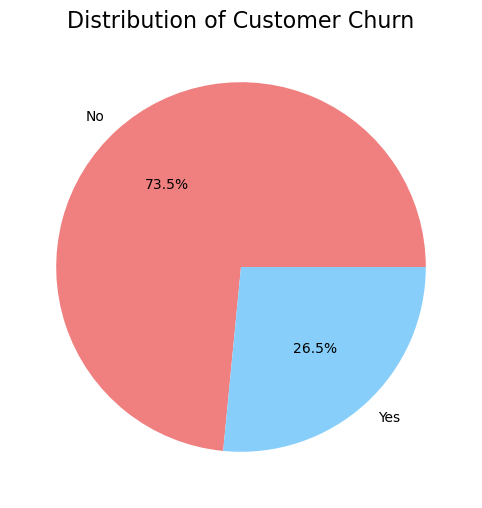

In [5]:
churn_counts = df['Churn Label'].value_counts()

plt.figure(figsize=(10, 6))  
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Customer Churn', fontsize=16)  

plt.show()

In [6]:
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

Based on the distribution, there seems to be a 26.5% population in the data that have cancelled their service with Telesco. 

### Demographic Data Analysis

In [7]:
demographic = ['Gender', 'Senior Citizen', 'Partner','Dependents']

In [8]:
df['Gender'].value_counts()

Gender
Male      3555
Female    3488
Name: count, dtype: int64

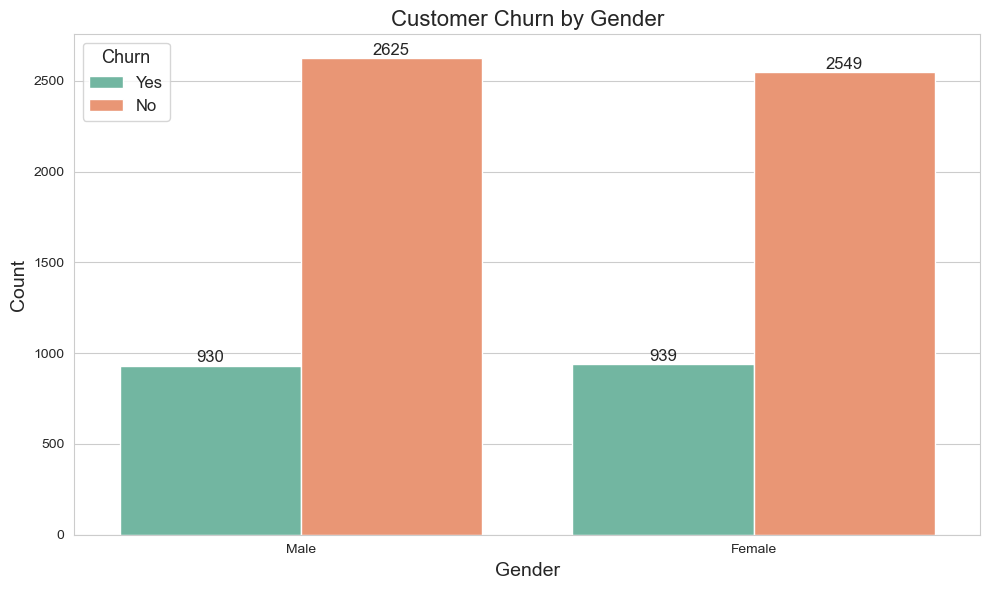

In [9]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6)) 
ax = sns.countplot(x='Gender', data=df, hue='Churn Label', palette='Set2')

plt.title('Customer Churn by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Churn', title_fontsize='13', fontsize='12')

for p in ax.patches:
    height = p.get_height()
    if not pd.isnull(height):
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.0f}'.format(height), 
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

There isn't a clear pattern with Gender. There is a near equal distribution of Male to Female. the proportion of Churn Users for each gender seems to be similar as well.

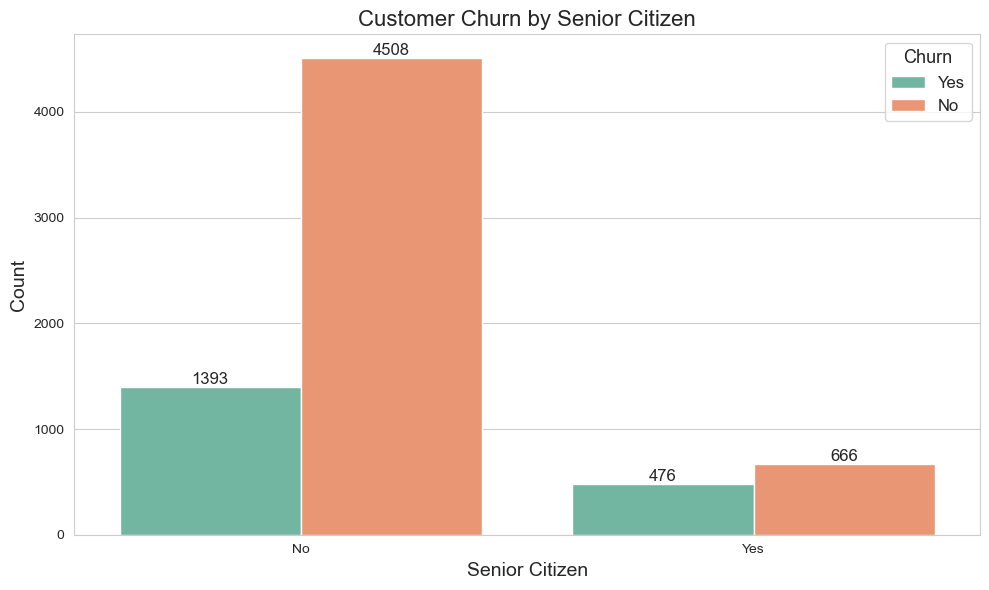

In [10]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6)) 
ax = sns.countplot(x='Senior Citizen', data=df, hue='Churn Label', palette='Set2')

plt.title('Customer Churn by Senior Citizen', fontsize=16)
plt.xlabel('Senior Citizen', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Churn', title_fontsize='13', fontsize='12')

for p in ax.patches:
    height = p.get_height()
    if not pd.isnull(height):
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.0f}'.format(height), 
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

There is a significant higher population of non-Senior Citizens. There is a higher proportion of Churn users in the Senior Citizen population. However, this isn't quite determininistic factor due to the small popular of Senior Citizen users.

If this was a clear pattern, it may possibly be that Senior Citizens are finding the services provided by Telco to be less useless in their late age. It may also be possible that there are Senior Citizens passing away, leading to a cancellation of services. 

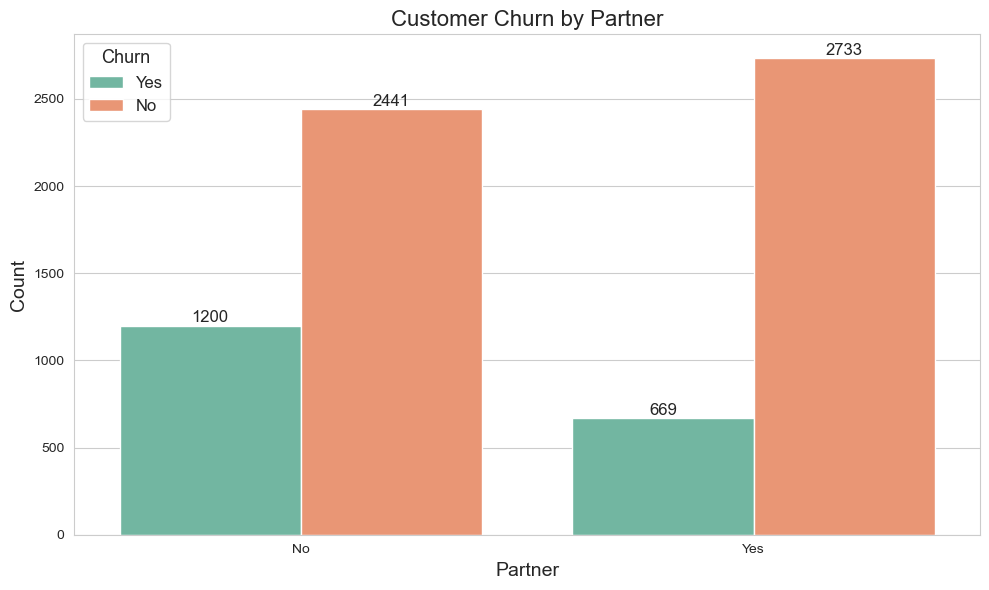

In [11]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6)) 
ax = sns.countplot(x='Partner', data=df, hue='Churn Label', palette='Set2')

plt.title('Customer Churn by Partner', fontsize=16)
plt.xlabel('Partner', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Churn', title_fontsize='13', fontsize='12')

for p in ax.patches:
    height = p.get_height()
    if not pd.isnull(height):
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.0f}'.format(height), 
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In this distribution of Churn Users between those with partners and without partners, There seems to be a higher proportion of Churn Users in the partner-less demographic, meaning those that are single. This phenomenon is possibly due to the fact that those with partners are settling down and signing up for services for the family. Single people, however, are more prone to experience unexpected changes like relocations, which may contribute to the higher Churn rate. 

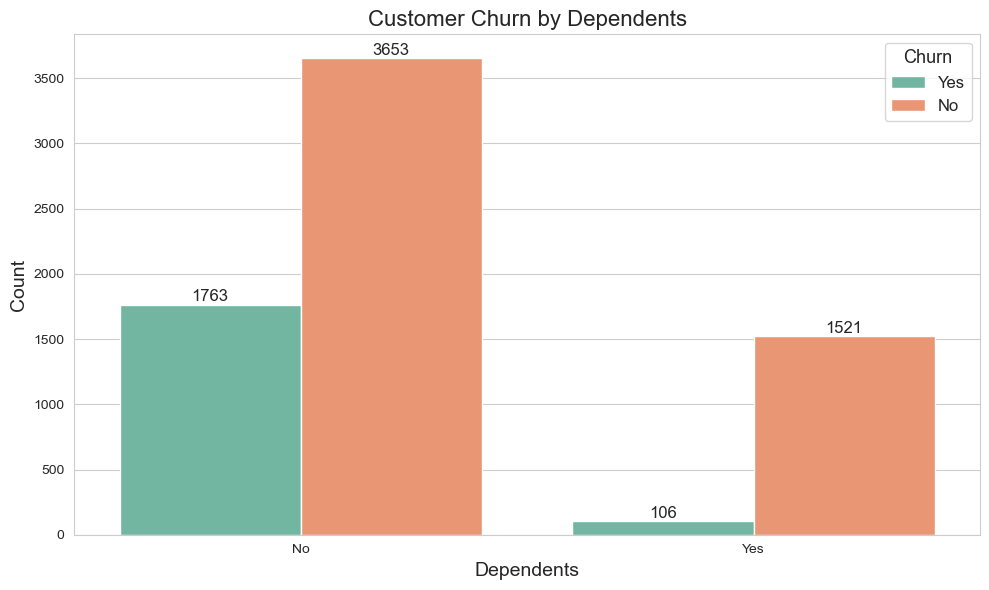

In [12]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6)) 
ax = sns.countplot(x='Dependents', data=df, hue='Churn Label', palette='Set2')

plt.title('Customer Churn by Dependents', fontsize=16)
plt.xlabel('Dependents', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Churn', title_fontsize='13', fontsize='12')

for p in ax.patches:
    height = p.get_height()
    if not pd.isnull(height):
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.0f}'.format(height), 
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

When looking at the demographics, there is a signficantly lower population that has dependents living with them like children, grandparents, or parents. In addition, there is a signficantly lower proportion of Churn users amongst those with dependents. Vice versa, those that live alone have a higher proportion of Churn users. 

C:\Users\seanp\AppData\Local\Temp\ipykernel_6028\1366794919.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df.loc[df['Churn Value'] == 1], x="Longitude", y="Latitude", palette="deep")


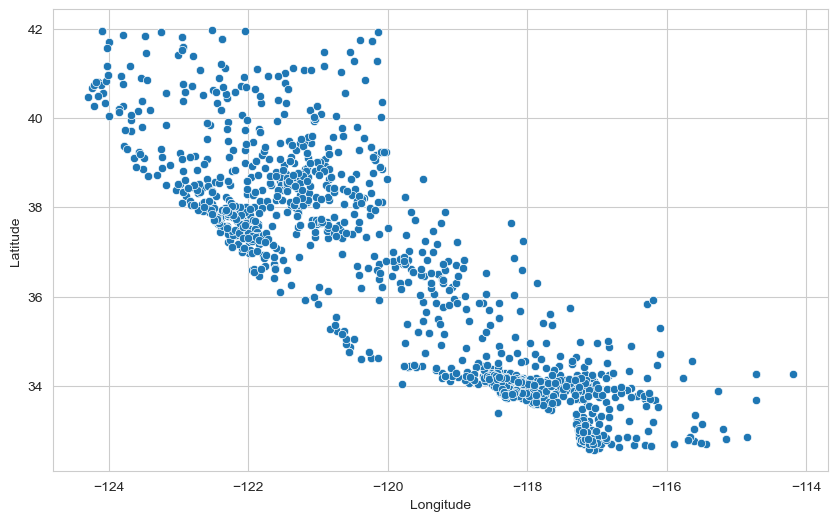

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.loc[df['Churn Value'] == 1], x="Longitude", y="Latitude", palette="deep")
plt.show()

C:\Users\seanp\AppData\Local\Temp\ipykernel_6028\3458421141.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df.loc[df['Churn Value'] == 0], x="Longitude", y="Latitude", palette="deep")


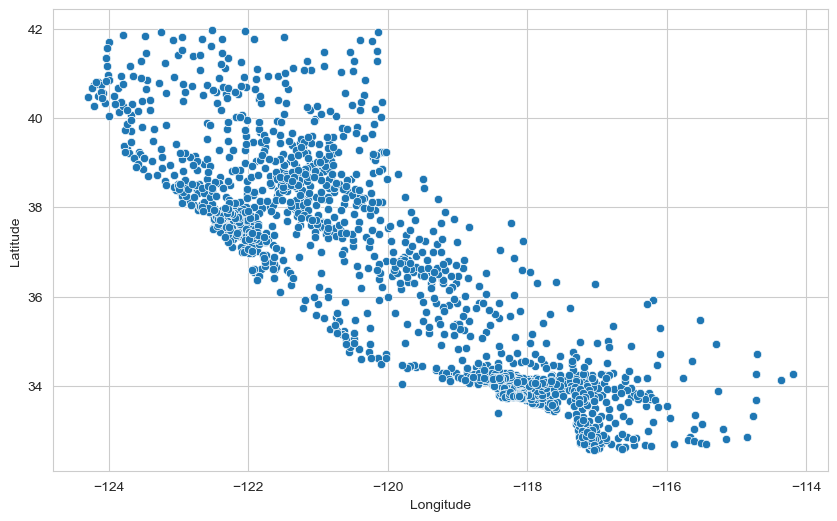

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.loc[df['Churn Value'] == 0], x="Longitude", y="Latitude", palette="deep")
plt.show()

### Customer Data

Now we will explore the customer spending behavior and their subscription to our services. 

In [15]:
spending = ['Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security','Online Backup',
           'Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method',
           'Monthly Charges','Total Charges','Churn Label','Churn Value','Churn Score','CLTV','Churn Reason']

In [16]:
df[spending]

,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [17]:
df.loc[df['Total Charges'] == ' ', 'Total Charges'] = '0'

In [18]:
df['Total Charges'] =df['Total Charges'].astype(float)
spending_behavior = df[spending]
spending_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tenure Months      7043 non-null   int64  
 1   Phone Service      7043 non-null   object 
 2   Multiple Lines     7043 non-null   object 
 3   Internet Service   7043 non-null   object 
 4   Online Security    7043 non-null   object 
 5   Online Backup      7043 non-null   object 
 6   Device Protection  7043 non-null   object 
 7   Tech Support       7043 non-null   object 
 8   Streaming TV       7043 non-null   object 
 9   Streaming Movies   7043 non-null   object 
 10  Contract           7043 non-null   object 
 11  Paperless Billing  7043 non-null   object 
 12  Payment Method     7043 non-null   object 
 13  Monthly Charges    7043 non-null   float64
 14  Total Charges      7043 non-null   float64
 15  Churn Label        7043 non-null   object 
 16  Churn Value        7043 

We notice that Total Charges ia object, when it should be integer value. Converting this will allow us to manipulate the data with more ease in the later steps.

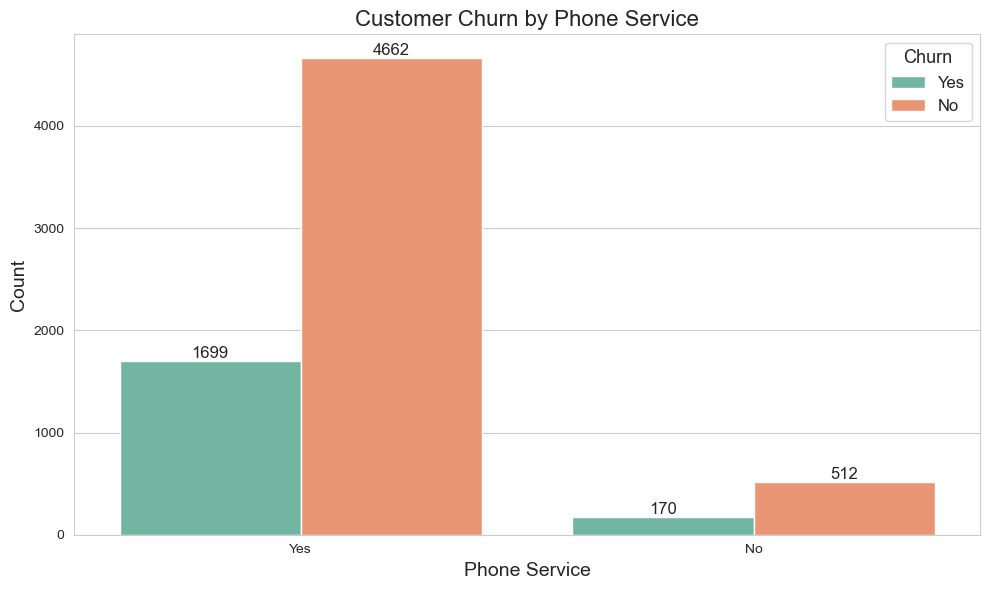

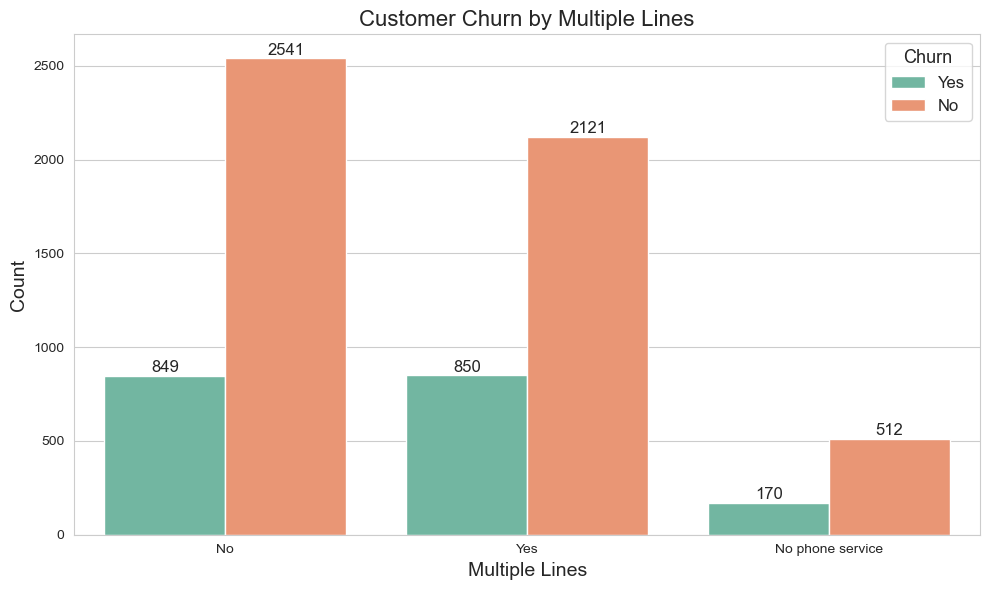

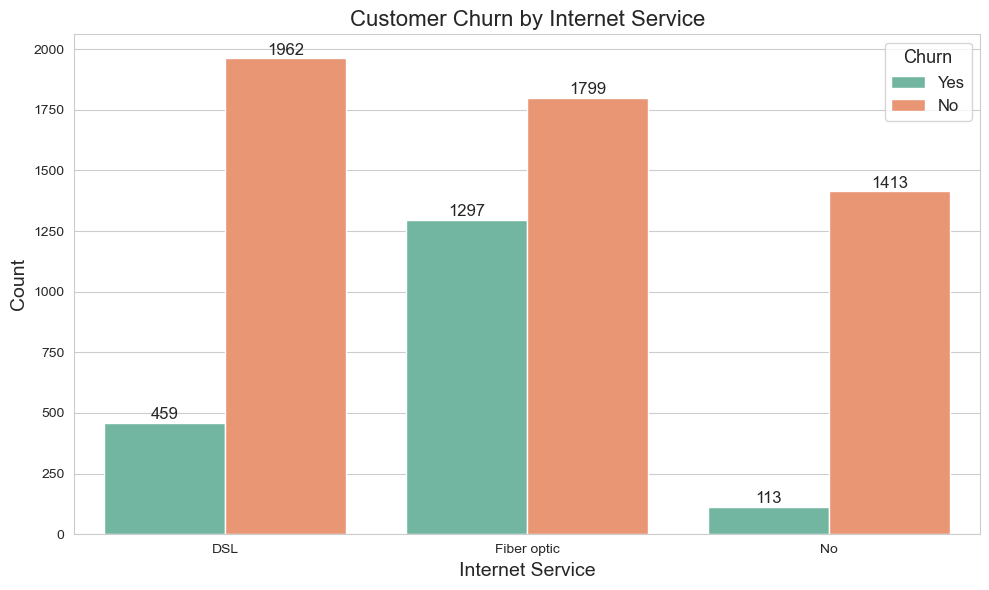

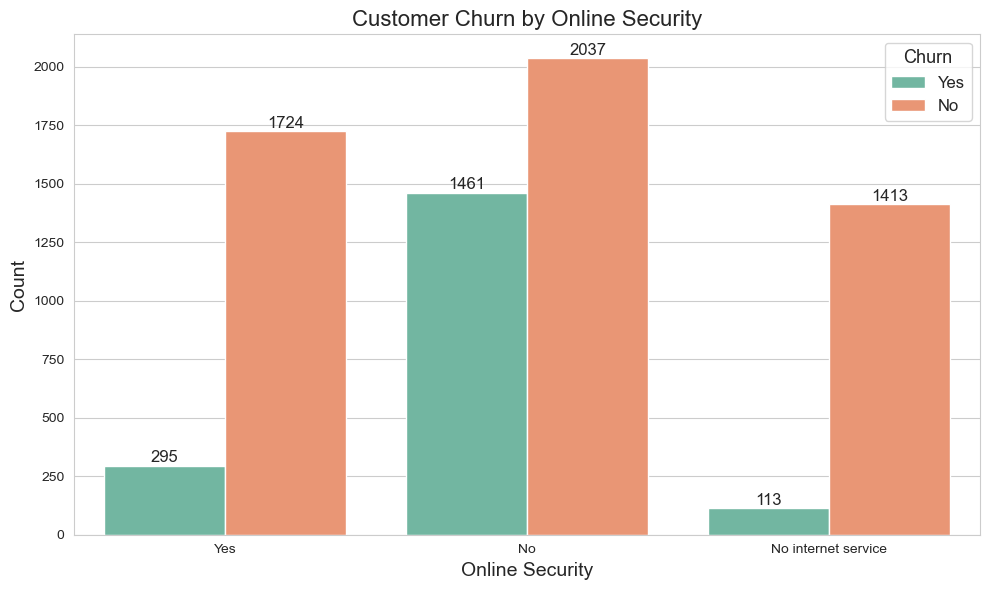

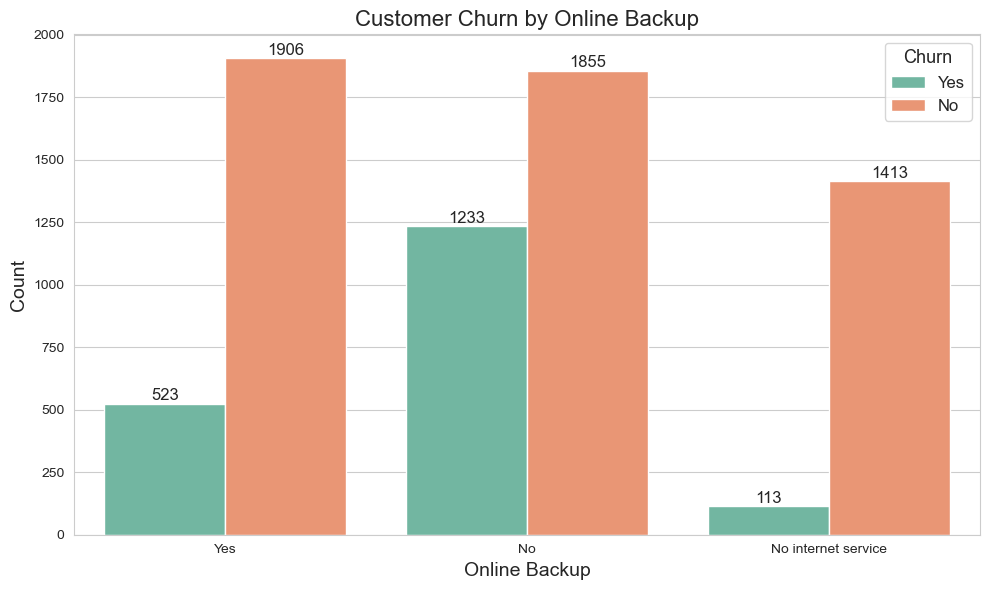

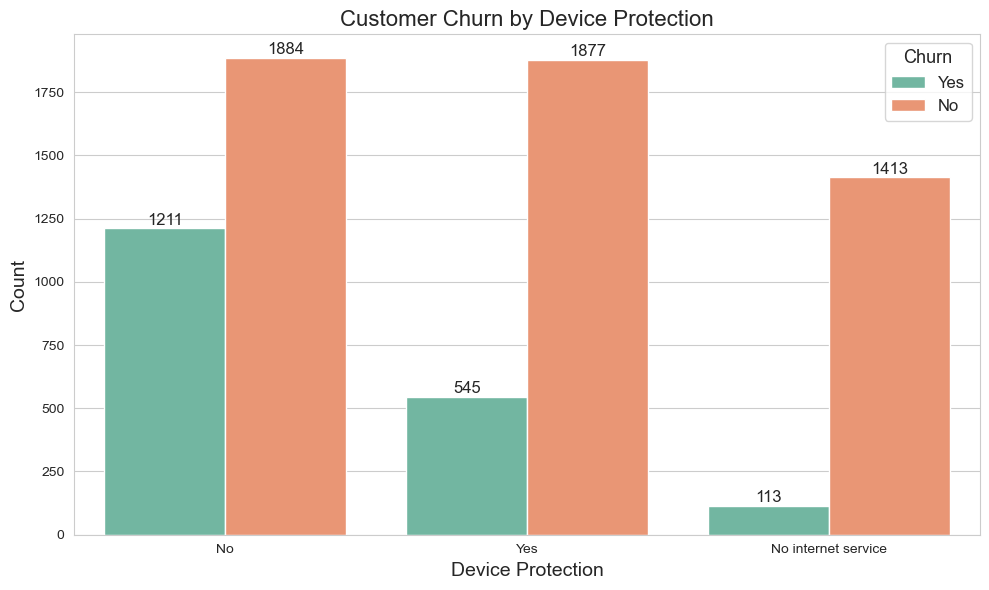

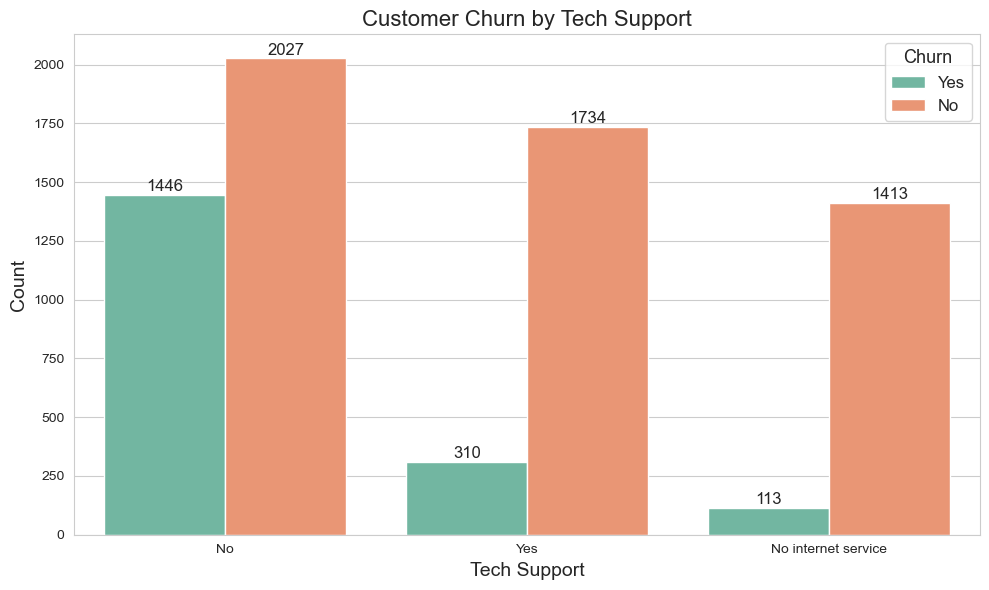

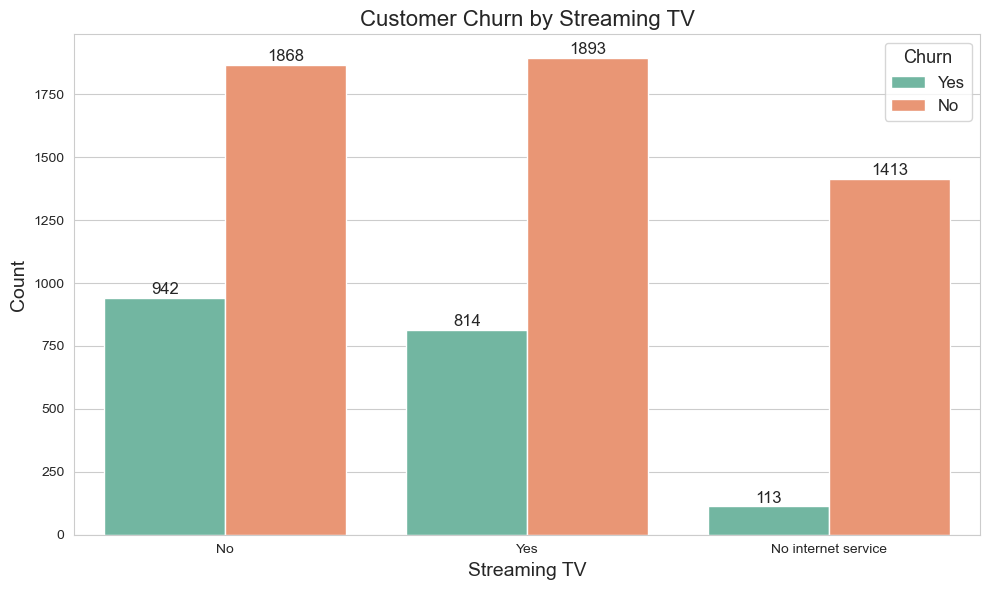

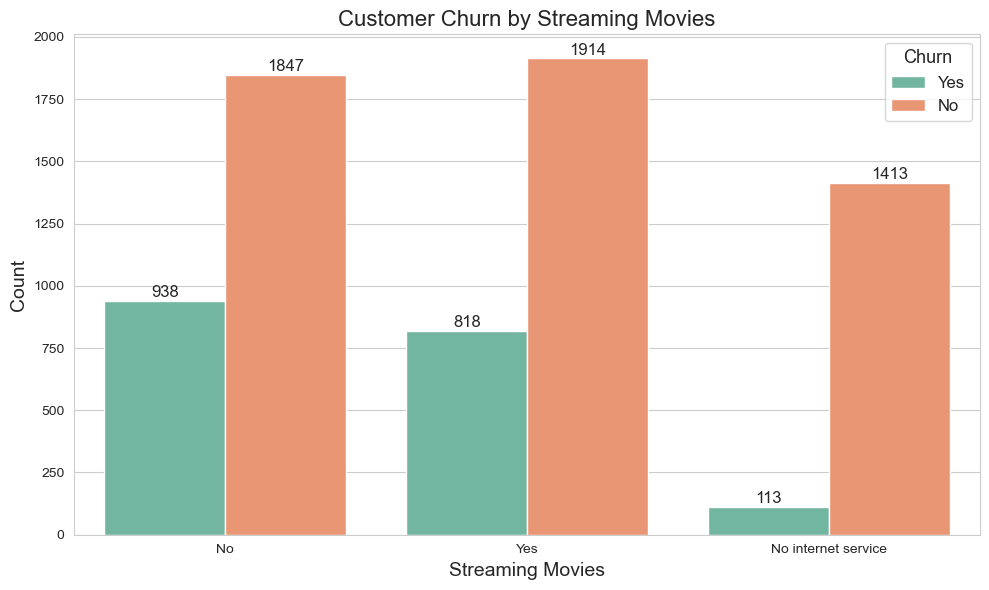

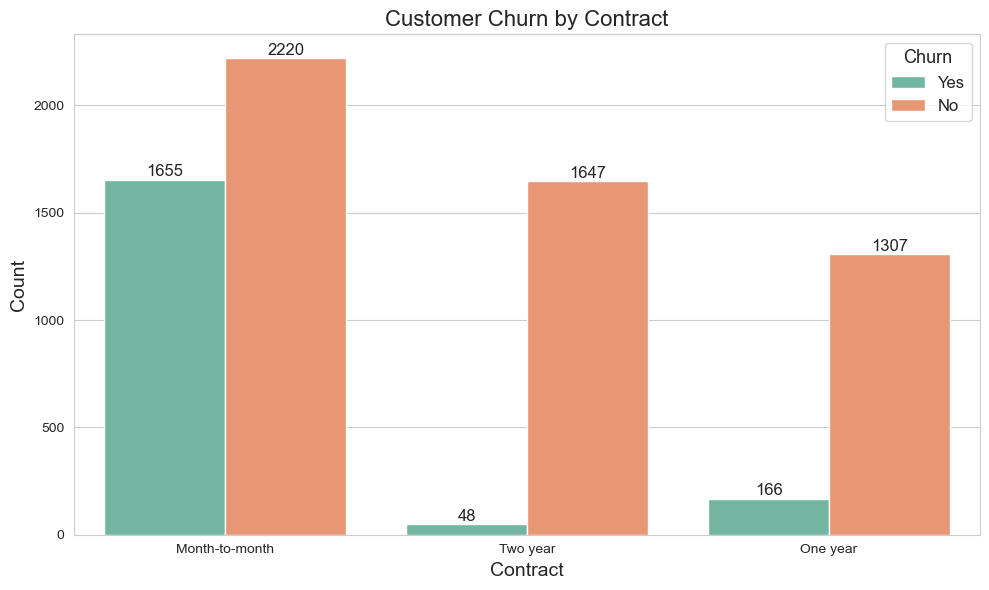

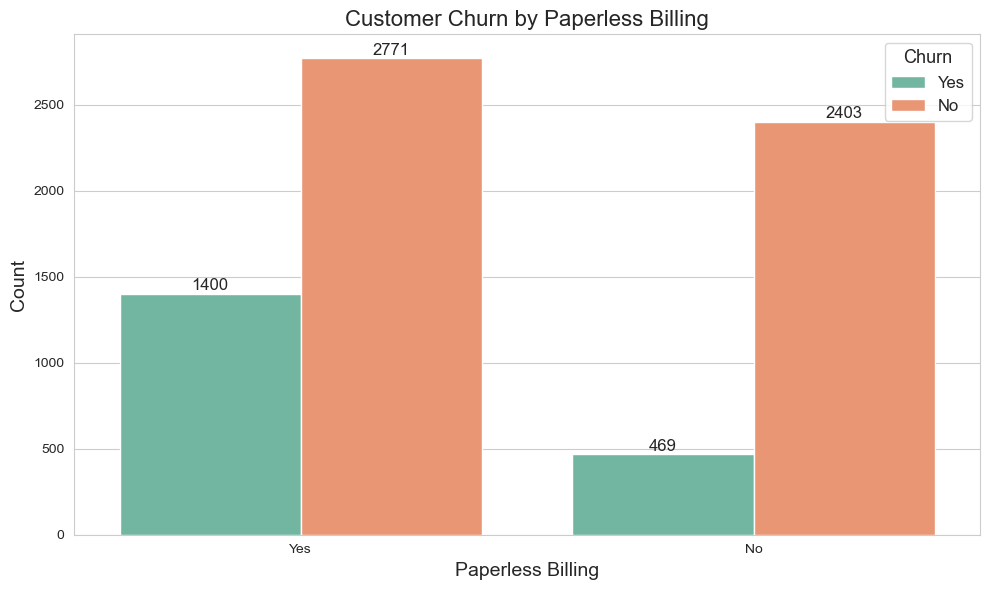

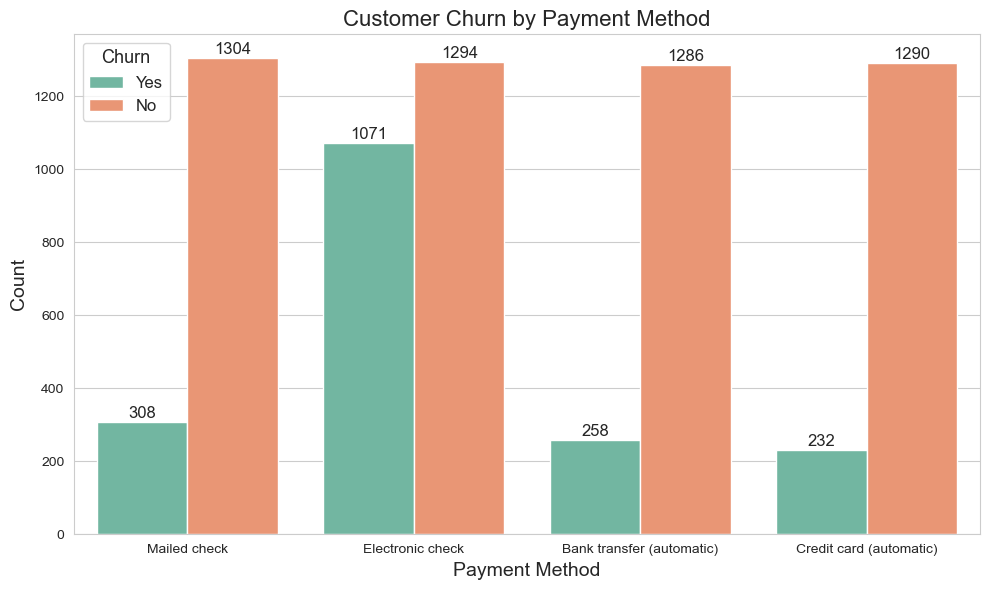

In [19]:
columns_to_plot = [col for col in spending_behavior.columns if col not in ['Churn Label', 'Churn Reason'] and spending_behavior[col].dtype == 'object']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=column, data=spending_behavior, hue='Churn Label', palette='Set2')
    
    plt.title(f'Customer Churn by {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='Churn', title_fontsize='13', fontsize='12')
    
    for p in ax.patches:
        height = p.get_height()
        if not pd.isnull(height):  
            ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.0f}'.format(height), 
                    ha='center', va='bottom', fontsize=12)

    plt.tight_layout()
    plt.show()

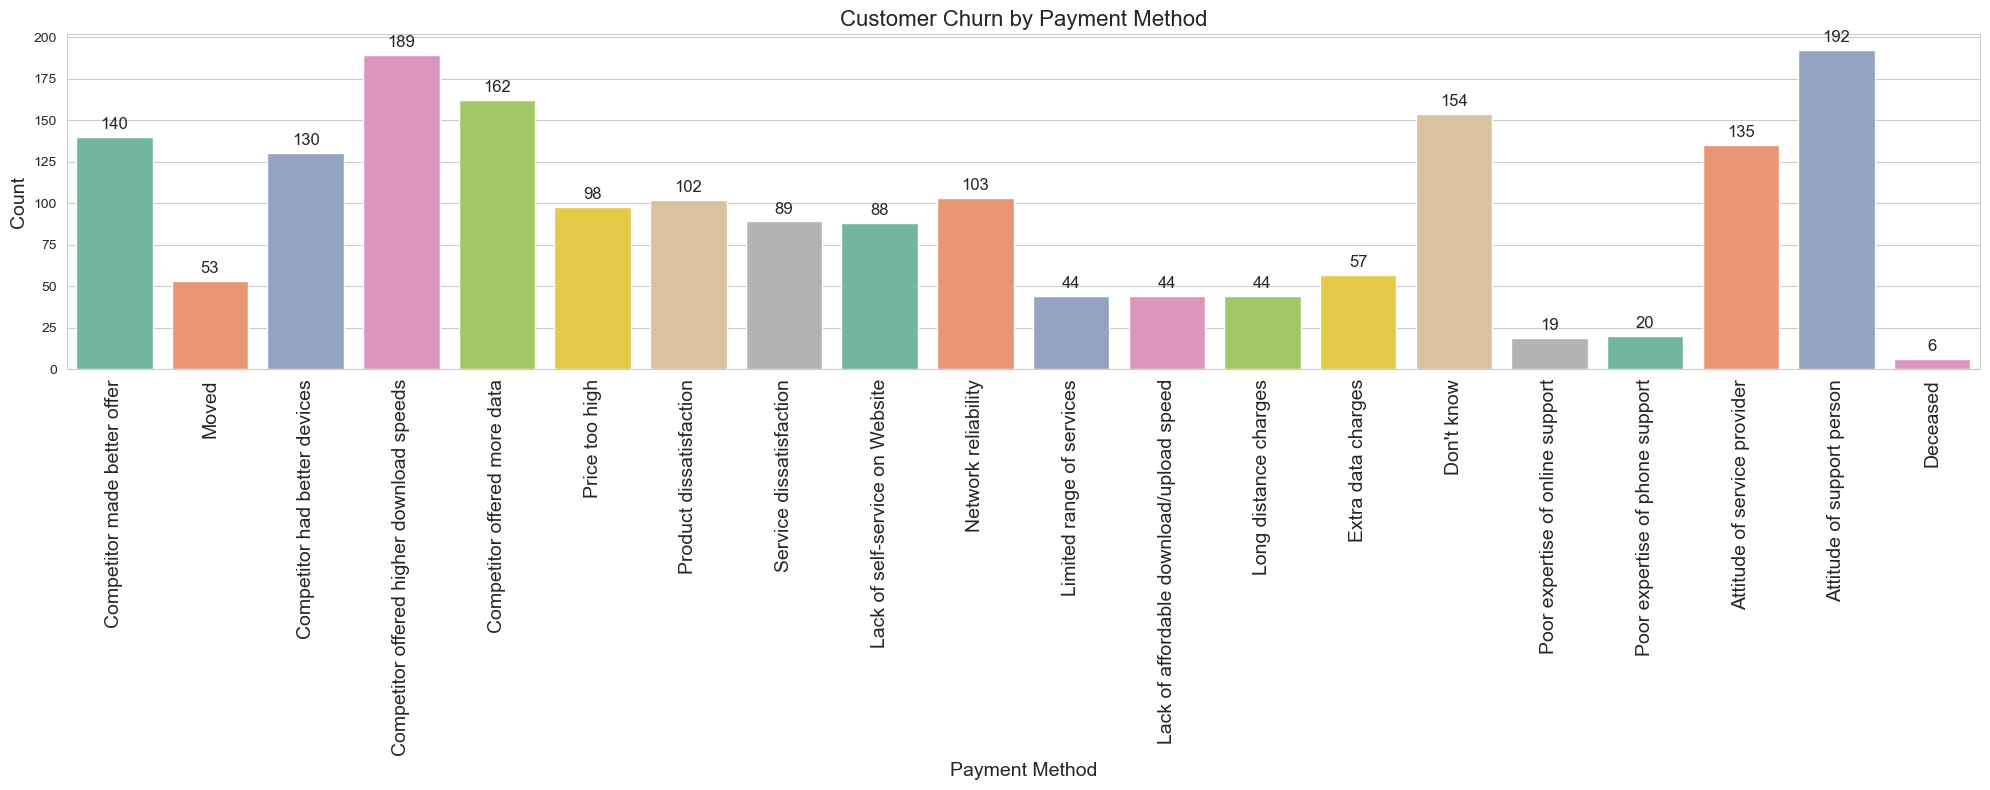

In [20]:
filtered_data = spending_behavior.dropna(subset=['Churn Reason'])

plt.figure(figsize=(20, 8))
ax = sns.countplot(x='Churn Reason', data=filtered_data, palette='Set2')
    
plt.title(f'Customer Churn by {column}', fontsize=16)
plt.xlabel(column, fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize = 14, rotation=90)
    
for p in ax.patches:
    height = p.get_height()
    if not pd.isnull(height):  
        ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.0f}'.format(height), 
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [21]:
filtered_data['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

#### Observations from Customer Data

First, let's focus on the reason for canceling subscription. These reasons can now be considered later in modifying our services to better retain the customer. However, first, we need to understand what is causing our customers to leave. Besides "Attitude of support person" or "Don't know", the main reasons for customers leaving us seems to be from competitor related events. This phenomenon is easy to understand as lower prices and better services from competitors will lead to our customers transferring their services to another provider. We also notice that some of the reasons overlap. The large categories are ['Bad Service', 'Competitor-Related', 'Product-Related']. For our purposes, they don't need to be grouped up right now, but we will consider goruping them later if our model requires. 

Next, let's take a look at the rest of the columns. These are the following columns that showed interesting analyses: Internet Service, Online Security, Online Backup, Device Protection, Tech Support, Contract, and Payment Method. The remaining columns didn't show a large disparity in the distribution of Churn users. 

**Internet Service**: We notice those that are using Fiber Optics internet service has a higher churn user count compared to the other internet service categories. Though this doesn't provide too much information regarding the customer, we are be able to deduce that there may be issues with the Fiber Optics internet service. 

**Online Security**, **Online Backup**, **Device Protection**, **Tech Support**: All four of these columns had a higher churn user count when the customers were not enrolled to these services. It is likely that customers who do have these services are less inclined to cancel either because 1) customer are enjoying these added services or 2) customer has spent a considerable amount of money on these services, and they don't want to spend more money canceling these services. 

**Contract**: Month-to-Month had the highest count of Churn users. The month-to-month users have more flexibility on when they can decide to cancel or switch to another provider. The lack of prolonged committment explains this phenomenon. 

**Payment Method**: Electronic Check seems to have the highest number of churn users. Though not clear, I hypothesize that this is because those paying with electronic checks may have easier time canceling their services


#### Now let's take a look at the numerical data.

For this, let's just focus on those that have cancelled their services with us (churn users). This will allow us to identify patterns, if any, about the distribution.

In [22]:
numerical = df[['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']]
numerical = numerical.loc[numerical['Churn Value'] == 1]
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 0 to 1868
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tenure Months    1869 non-null   int64  
 1   Monthly Charges  1869 non-null   float64
 2   Total Charges    1869 non-null   float64
 3   Churn Value      1869 non-null   int64  
 4   Churn Score      1869 non-null   int64  
 5   CLTV             1869 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 102.2 KB


C:\Users\seanp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Tenure Months', ylabel='Count'>

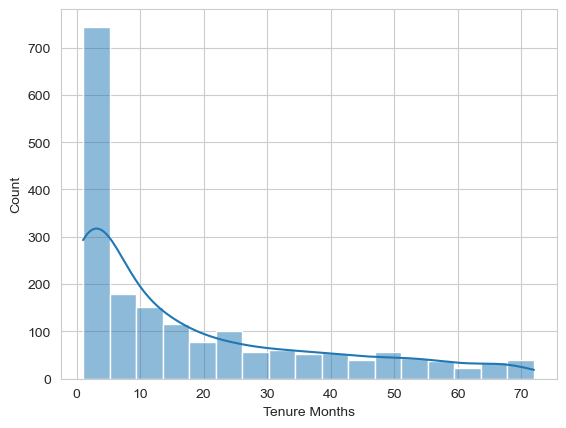

In [23]:
sns.histplot(data=numerical, x="Tenure Months", kde=True)

C:\Users\seanp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Monthly Charges', ylabel='Count'>

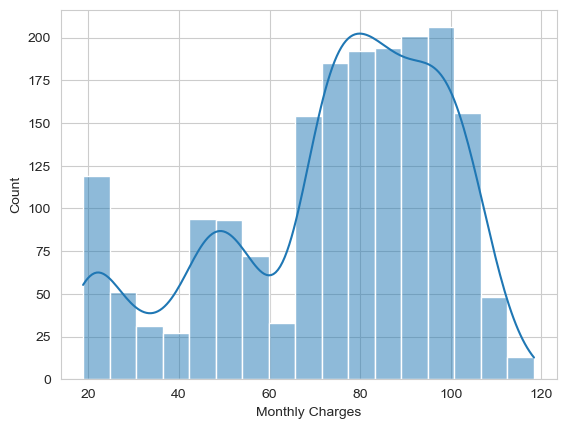

In [24]:
sns.histplot(data=numerical, x="Monthly Charges", kde=True)

C:\Users\seanp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total Charges', ylabel='Count'>

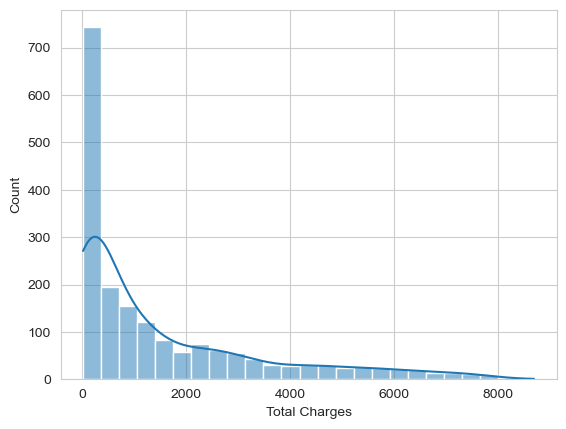

In [25]:
sns.histplot(data=numerical, x="Total Charges", kde=True)

C:\Users\seanp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Churn Score', ylabel='Count'>

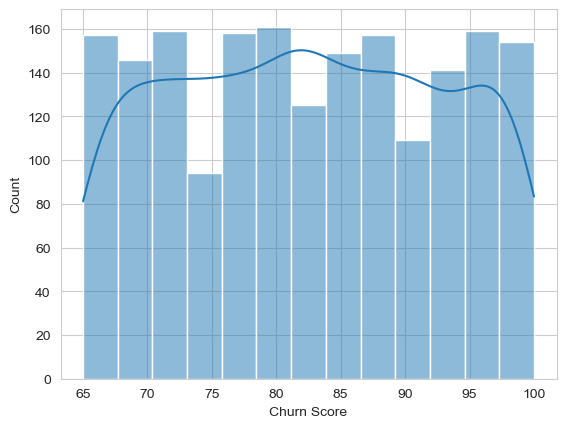

In [26]:
sns.histplot(data=numerical, x="Churn Score", kde=True)

C:\Users\seanp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Churn Score', ylabel='Count'>

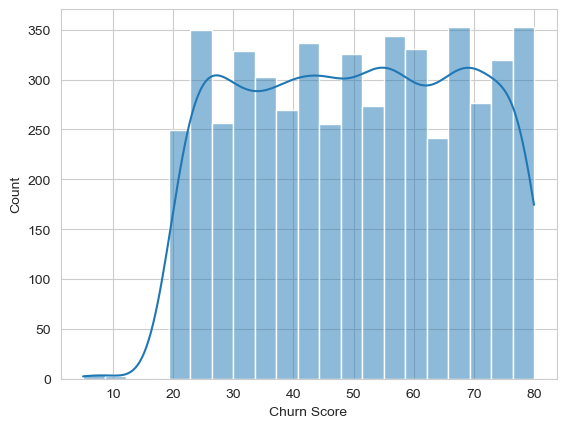

In [27]:
sns.histplot(data = df.loc[df['Churn Value'] == 0], x = 'Churn Score', kde = True)

C:\Users\seanp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CLTV', ylabel='Count'>

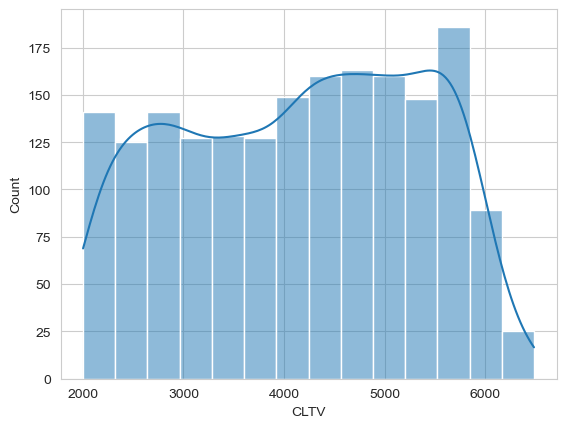

In [28]:
sns.histplot(data=numerical, x="CLTV", kde=True)

On the visualizations above, we filtered out only the cases in which the user cancelled their services this quarter. By observing these distributions, we hoped to identify some key insights. 

First, we notice a higher density of churn users where Tenure months are shorter, which means that a lot of users are leaving without forming a concrete relationship with Telesco. Brand loyalty may be an issues. 

Second, we notice there's higher density around monthly charges that are high. This means that a lot of the users who left Telesco were paying high monthly charges prior to their departure. Competitors could have offered those customers lower rates or a better product at the same price range. 

Third, Total Charges has higher density in the lower ranges. This also supports our hypothesis that customers are leaving before they are able to form concrete relationships with Telesco. 

Fourth, we notice that Churn Score, or a value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler(The higher the score, the more likely the customer will churn), was not effective in identifying the churn users. The score seems to be nonpartial is actually predicting correct churn users. 

Lastly, Customer Lifetime Value seems to show no particular pattern as well.

We will next explore if similar patterns from non-churn users support our insights

C:\Users\seanp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Tenure Months', ylabel='Count'>

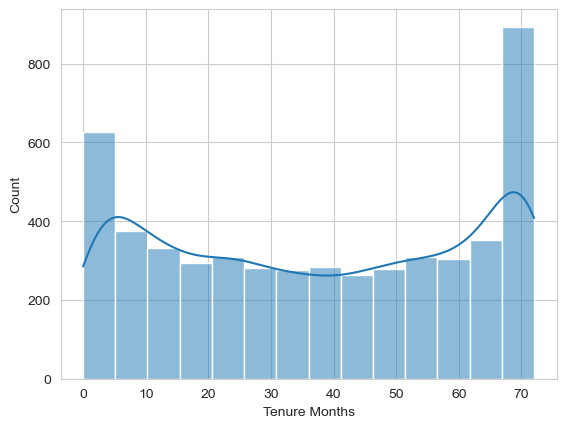

In [29]:
sns.histplot(data = df.loc[df['Churn Value'] == 0], x = 'Tenure Months', kde = True)

C:\Users\seanp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Monthly Charges', ylabel='Count'>

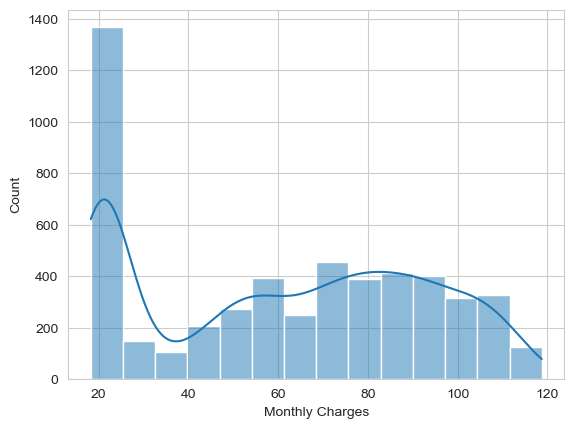

In [30]:
sns.histplot(data = df.loc[df['Churn Value'] == 0], x = 'Monthly Charges', kde = True)

C:\Users\seanp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total Charges', ylabel='Count'>

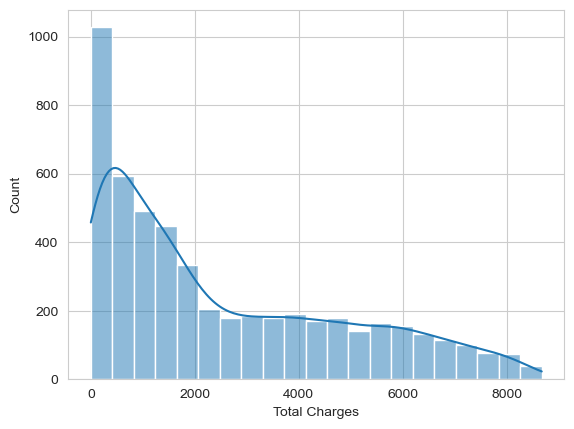

In [31]:
sns.histplot(data = df.loc[df['Churn Value'] == 0], x = 'Total Charges', kde = True)

C:\Users\seanp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Churn Score', ylabel='Count'>

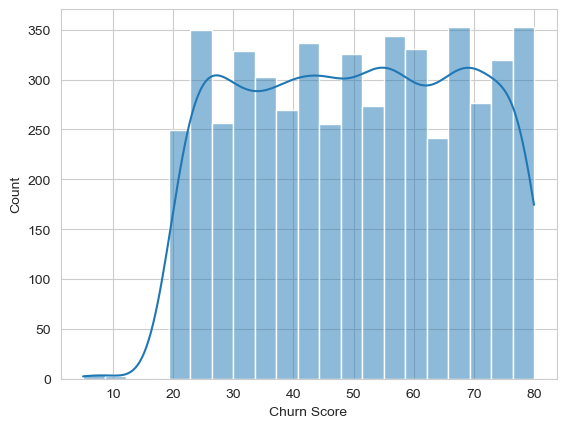

In [32]:
sns.histplot(data = df.loc[df['Churn Value'] == 0], x = 'Churn Score', kde = True)

C:\Users\seanp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CLTV', ylabel='Count'>

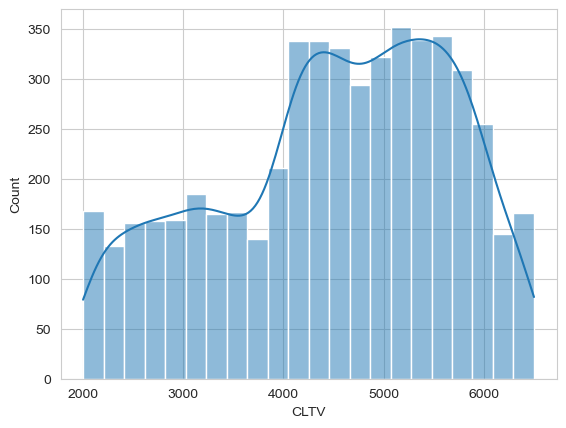

In [33]:
sns.histplot(data = df.loc[df['Churn Value'] == 0], x = 'CLTV', kde = True)

From the subset of users who stayed with Telesco this quarter, I looked at the distributions for the variables like I did above. From this comparison, I am unable to find any new patterns that may show new insights. We can gather the following information: Customers who have had a long relationship with us (Tenure Months) are staying loyal to our brand, Customers who have lower monthly rates are staying with us more, Total charges seems to display a similar pattern as the distribution with churn users. 

Besides this, we are again able to see that Churn Score is inaccurate in predicting churn users. 
Customer Lifetime Value (CLTV) doesn't show any clear patterns, but we can observe that there is a higher density of users between 4000 - 5500 CLTV, meaning that we are able to retain some of our high potential clients.

## Data Cleaning

With classification algorithm, many can't handle categorical data. Even if they were able to, it often helps to convert these figures into numerical values by one-hot coding in order to produce better results. 

In this step, we will first drop the unneeded columns like location, customerID, Churn Label, and Churn Reason. Churn Reason is mainly being removed, because this will not help in the model predicting whether a client with cancel their service with us in the future or not. Rather, it's something that can be studies to improve the current products and services. 

In addition, classification algorithms are sensitive to the balance of the classes. Balancing is needed in classification algorithms to prevent model bias toward the majority class and ensure fair representation of all classes, especially in scenarios where the minority class is of greater interest or importance, such as Churn predictions. Without balancing, the model may overlook significant patterns in the minority class, leading to poor predictive performance and potentially costly errors in decision-making.

In [34]:
df = df.drop(['CustomerID', 'Count', 'Country','State','City','Zip Code', 'Lat Long', 'Latitude', 
              'Longitude', 'Churn Label', 'Churn Reason'], axis = 1)
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,86,3239
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,67,2701
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,86,5372
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,84,5003
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,89,5340


In [35]:
binary = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']
categorical = ['Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
              'Streaming TV', 'Streaming Movies', 'Contract', 'Payment Method'] 
nums = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value','Churn Score', 'CLTV'] 

In [36]:
for col in binary:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})

In [37]:
cols_to_update = ['Multiple Lines', 'Online Security', 'Online Backup', 
                  'Device Protection', 'Tech Support', 'Streaming TV', 
                  'Streaming Movies']

for col in cols_to_update:
    df[col] = df[col].replace({'No internet service': 'No'})

df['Multiple Lines'] = df['Multiple Lines'].replace({'No phone service': 'No'})

for col in cols_to_update:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [38]:
df = pd.get_dummies(df, columns=['Internet Service', 'Contract', 'Payment Method'], drop_first=False)

In [39]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
1,0,0,0,1,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
2,0,0,0,1,8,1,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
3,0,0,1,1,28,1,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
4,1,0,0,1,49,1,1,0,1,1,...,False,True,False,True,False,False,True,False,False,False


In [40]:
df.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Paperless Billing', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Score', 'CLTV', 'Internet Service_DSL',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')

In [41]:
relevant = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
            'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup', 
            'Device Protection', 'Tech Support', 'Streaming TV', 
            'Streaming Movies', 'Paperless Billing', 'Monthly Charges', 'Total Charges',
            'Internet Service_DSL', 'Internet Service_Fiber optic', 'Internet Service_No',
            'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
            'Payment Method_Bank transfer (automatic)', 'Payment Method_Credit card (automatic)',
            'Payment Method_Electronic check', 'Payment Method_Mailed check', 'Churn Score', 'CLTV', 'Churn Value']
df = df[relevant]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Gender                                    7043 non-null   int64  
 1   Senior Citizen                            7043 non-null   int64  
 2   Partner                                   7043 non-null   int64  
 3   Dependents                                7043 non-null   int64  
 4   Tenure Months                             7043 non-null   int64  
 5   Phone Service                             7043 non-null   int64  
 6   Multiple Lines                            7043 non-null   int64  
 7   Online Security                           7043 non-null   int64  
 8   Online Backup                             7043 non-null   int64  
 9   Device Protection                         7043 non-null   int64  
 10  Tech Support                        

### Correlation Analysis

We will be doing a correlation analysis of the numerical columns in order to see if there is a high correlation between any columns and Churn Value. By doing so, we will be able to better clean our data for easier processing with our models

In [42]:
df.corr()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn Score,CLTV,Churn Value
Gender,1.000000,-0.001874,-0.001808,0.005229,0.005106,-0.006488,-0.008414,-0.017021,-0.013773,-0.002105,...,-0.003386,0.008026,-0.003695,-0.016024,0.001215,0.000752,0.013744,0.000311,-0.006851,-0.008612
Senior Citizen,-0.001874,1.000000,0.016479,-0.174396,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,...,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477,0.102181,-0.003167,0.150889
Partner,-0.001808,0.016479,1.000000,0.363430,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,...,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125,-0.111013,0.137859,-0.150448
Dependents,0.005229,-0.174396,0.363430,1.000000,0.131376,0.000625,-0.027510,0.050353,0.003457,-0.022343,...,-0.175496,0.014680,0.190262,0.048303,0.041254,-0.141476,0.071056,-0.174950,0.058222,-0.248542
Tenure Months,0.005106,0.016567,0.379697,0.131376,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,...,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852,-0.224987,0.396406,-0.352229
Phone Service,-0.006488,0.008576,0.017706,0.000625,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,...,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319,0.024136,0.023015,0.011942
Multiple Lines,-0.008414,0.142948,0.142057,-0.027510,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,...,-0.088203,-0.003794,0.106253,0.075527,0.060048,0.083618,-0.227206,0.043252,0.133568,0.040102
Online Security,-0.017021,-0.038653,0.143106,0.050353,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,...,-0.246679,0.100162,0.191773,0.095158,0.115721,-0.112338,-0.080798,-0.119039,0.138354,-0.171226
Online Backup,-0.013773,0.066572,0.141498,0.003457,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,...,-0.164172,0.083722,0.111400,0.087004,0.090785,-0.000408,-0.174164,-0.046879,0.138610,-0.082255
Device Protection,-0.002105,0.059428,0.153786,-0.022343,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,...,-0.225662,0.102495,0.165096,0.083115,0.111554,-0.003351,-0.187373,-0.054870,0.120394,-0.066160


<Axes: >

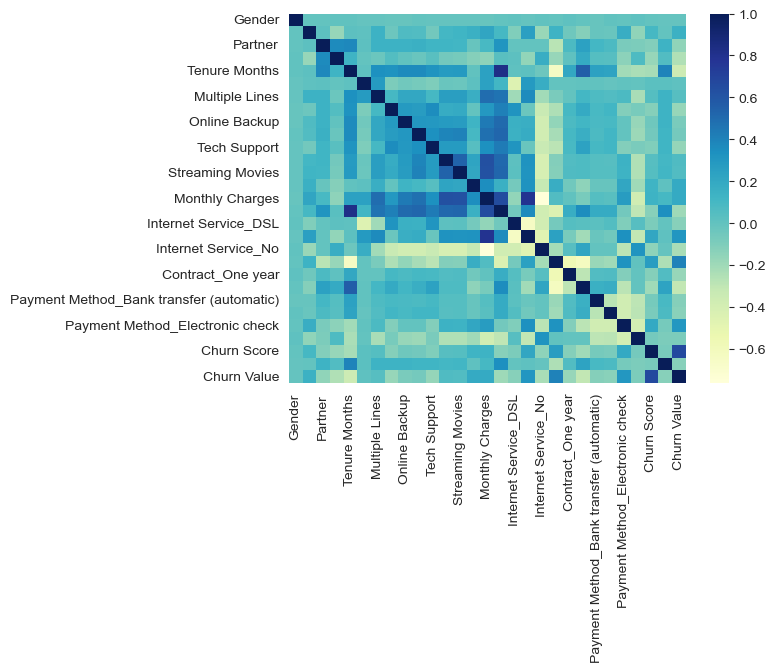

In [43]:
sns.heatmap(df.corr(), cmap="YlGnBu")

## Model Selection

In this endeavor, I plan on testing 5 different models: Logistic Regression, Random Forest, Gradient Boosting, Support Vector Machines, and Neural Networks. With thorough testing, we will improve each of our models' performances, and, ultimately, provide the best model for predicting Churn Users. 

It is important to note that there is an uneven distribution of 'Yes' and 'No' values in Churn column. This introduces the risk that our models may put heavier emphasis on the more represented class. In order to address this issue, we will be assigning class weights in our models. This is not about the weight assigned to each column or feature, but rather the importance assigned to each class. By modifying class weights, we can make our model pay more attention to the minority class, which is often underrepresented in the dataset and, therefore, more likely to be misclassified. In models that I'm training, I will be setting the class_weights as balanced in order to address this potential issue. 

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

For training, validating, and testing, we will be using a 80/10/10 split. The validation set will allow us to find areas to improve our model before testing it on the main set. This will be a measure to counter overfitting to the testing set. 

In [45]:
X = df.drop('Churn Value', axis = 1)
y = df['Churn Value']

### Logistic Regression

We are scaling this data so that the logistic regression model can find convergence faster. Though the model is not sensitive to scale of the data, Logistic regression typically uses optimization algorithms (like gradient descent) to find the best parameters (weights) for the model. If the features have very different scales, some weights may update much faster than others during training, which can lead to slower convergence towards the minimum of the cost function. Scaling ensures that all features contribute equally to the cost function, leading to faster convergence.

Although logistic regression itself might not require scaled data for its basic functioning, scaling can improve the interpretability of the model coefficients. When features are on the same scale, you can compare the magnitude of the coefficients directly to assess the relative importance of each feature.

In [46]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)  
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=1/9, random_state=42)  

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [47]:
lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [48]:
y_pred = lr.predict(X_val_scaled) 
y_proba = lr.predict_proba(X_val_scaled)[:, 1]  

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_proba)  

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.92
Precision: 0.81
Recall: 0.92
F1 Score: 0.86
ROC AUC Score: 0.98


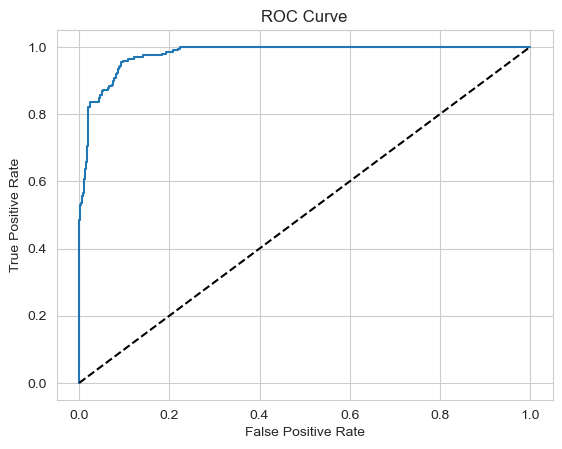

In [49]:
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

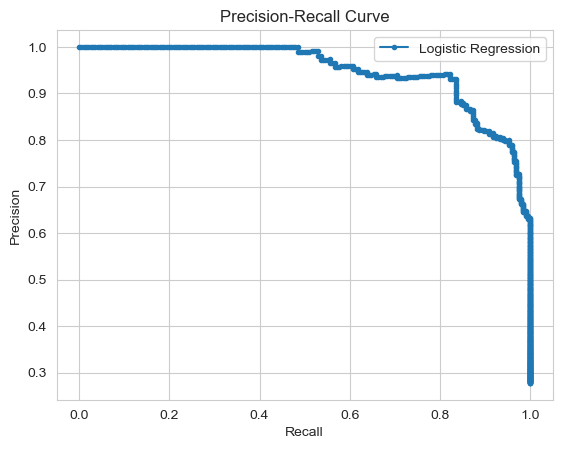

In [50]:
precision, recall, _ = precision_recall_curve(y_val, y_proba)

plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()

In [51]:
coefs = lr.coef_[0]

feature_names = X_train.columns
feature_importance = pd.Series(coefs, index=feature_names)

sorted_feature_importance = feature_importance.abs().sort_values(ascending=False)

print(sorted_feature_importance)

Churn Score                                 4.312262
Tenure Months                               1.182196
Dependents                                  0.613837
Internet Service_No                         0.513222
Internet Service_Fiber optic                0.409666
Total Charges                               0.395401
Contract_Two year                           0.393949
Contract_Month-to-month                     0.360633
Monthly Charges                             0.341754
Paperless Billing                           0.222939
Payment Method_Electronic check             0.183824
Online Backup                               0.127325
Streaming Movies                            0.121113
Partner                                     0.118377
Payment Method_Credit card (automatic)      0.113401
Online Security                             0.109629
Streaming TV                                0.108968
Payment Method_Mailed check                 0.091361
Device Protection                           0.

In [52]:
cm = confusion_matrix(y_val, y_pred)

cm_df = pd.DataFrame(cm, 
                     index=['Actual Negative', 'Actual Positive'], 
                     columns=['Predicted Negative', 'Predicted Positive'])

print(cm_df)

                 Predicted Negative  Predicted Positive
Actual Negative                 466                  43
Actual Positive                  16                 180


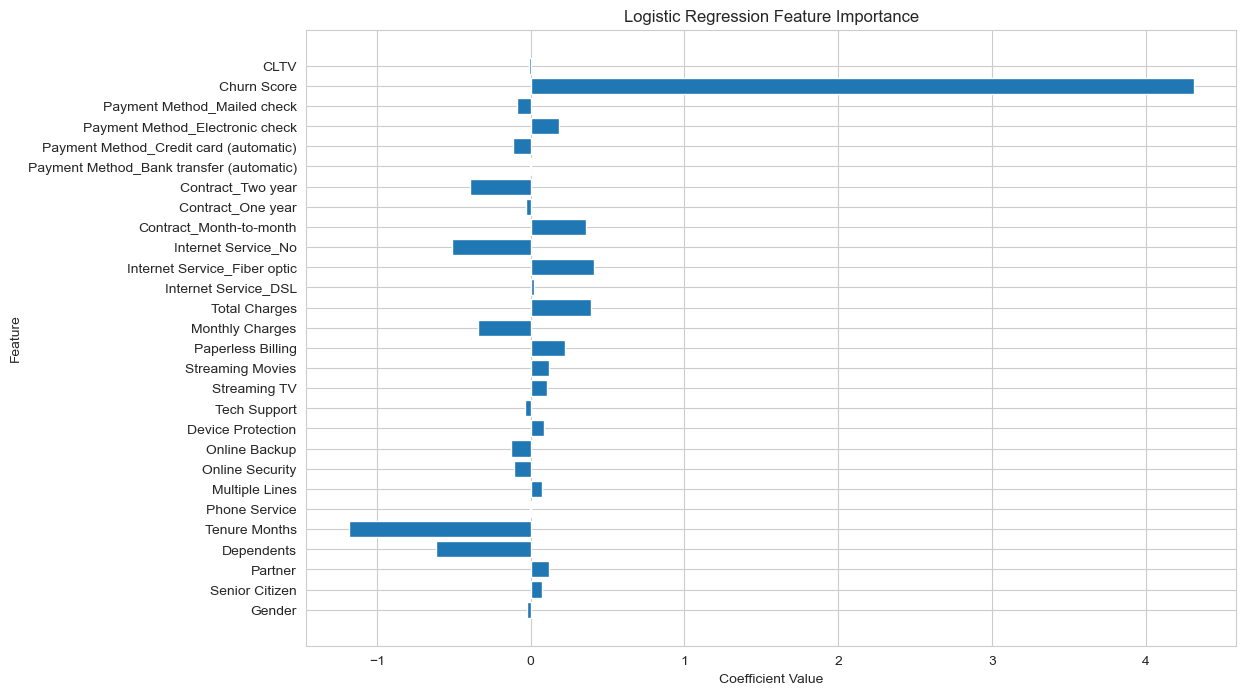

In [53]:
import matplotlib.pyplot as plt
import numpy as np

coefficients = lr.coef_.flatten()
feature_names = X.columns

plt.figure(figsize=(12, 8))
plt.barh(feature_names, coefficients)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Logistic Regression Feature Importance")
plt.show()

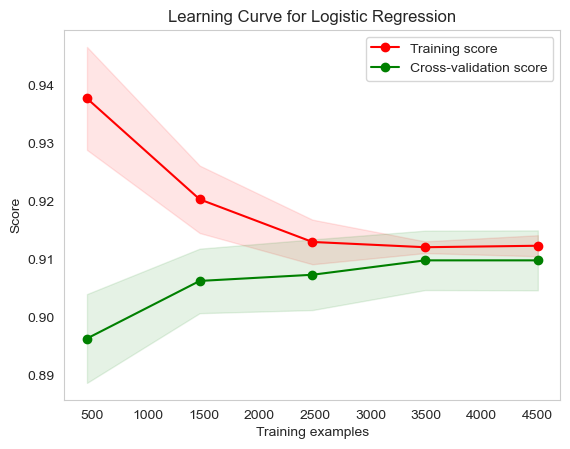

In [54]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(lr, 'Learning Curve for Logistic Regression', X_train_scaled, y_train, cv=5)
plt.show()

Above is the logistic regression model that we trained and validated. First, it is important to note that the class_weight were balanced and the default penalty applied in LogisticRegression model is L2 penalty. Regularization is a technique used to prevent overfitting in machine learning models, which happens when the model is too complex and captures noise from the training data. Overfitting leads to poor generalization on unseen data. Regularization addresses this issue by adding a penalty term to the loss function used to train the model. This penalty discourages overly complex models by penalizing large coefficients in linear models like logistic regression. The primary effect is to ensure that no single feature dominates the regression model, by keeping the coefficient values relatively small, which promotes a model that generalizes better. L2 regularization discourages the weights from reaching large values, which can be a sign of overfitting to the training data.

**Accuracy (0.92)**: This metric tells you the proportion of true results (both true positives and true negatives) in the total dataset. An accuracy of 0.92 means that 92% of your model's predictions were correct. While high accuracy is desirable, it's important to consider it in context, especially if the data is imbalanced (i.e., the number of instances in each class significantly differs).

**Precision (0.81)**: Precision measures the proportion of true positive results in all positive predictions made by the model. A precision of 0.81 means that when your model predicts the positive class, it is correct 81% of the time. High precision indicates a low false positive rate, which is crucial in scenarios where the cost of a false positive is high.

**Recall (0.92)**: Recall (or sensitivity) measures the proportion of actual positives that were correctly identified by the model. A recall of 0.92 means that the model correctly identifies 92% of all actual positive cases. High recall is essential in situations where missing a positive case (i.e., a false negative) has serious consequences.

**F1 Score (0.86)**: The F1 score is the harmonic mean of precision and recall, providing a single metric to assess the balance between them. An F1 score of 0.86 suggests that your model achieves a good balance between precision and recall, which is particularly valuable when you care equally about these two metrics.

**ROC AUC Score (0.98)**: The Receiver Operating Characteristic (ROC) curve plots the true positive rate (recall) against the false positive rate at various threshold settings. The Area Under the ROC Curve (AUC) score represents the likelihood of the model distinguishing between positive and negative classes. An AUC score of 0.98 is excellent, indicating a high degree of separability between the positive and negative classes. High ROC AUC scores are desirable and indicate that the model performs well across all classification thresholds.

We can also examine the feature importances in order to understand which features are most influential in predicting the target variable. Previously doing EDA, we had hypothesized that the Churn Score isn't a signficant identifier in predicting Churn. However, based on our logistic regression algorithm, it is clear that Churn Score is an accurate measure of prediction.

Overall, the performance of the model seems to be efficient, and it appears to be highly effective in identifying potential churn users. Below, we will experiment with L1 regularization. However, if no signficant improvement is found, we will move on to the next model. 

In [55]:
lr_l1 = LogisticRegression(class_weight='balanced', max_iter=1000, penalty = 'l1', solver = 'saga')
lr_l1.fit(X_train_scaled, y_train)

y_pred = lr_l1.predict(X_val_scaled) 
y_proba = lr_l1.predict_proba(X_val_scaled)[:, 1]  

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_proba)  

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.92
Precision: 0.81
Recall: 0.92
F1 Score: 0.86
ROC AUC Score: 0.98


In [56]:
coefs = lr_l1.coef_[0]

feature_names = X_train.columns
feature_importance = pd.Series(coefs, index=feature_names)

sorted_feature_importance = feature_importance.abs().sort_values(ascending=False)

print(sorted_feature_importance)

Churn Score                                 4.392259
Tenure Months                               1.170035
Dependents                                  0.615329
Internet Service_No                         0.416653
Contract_Month-to-month                     0.395581
Total Charges                               0.368292
Contract_Two year                           0.362243
Internet Service_Fiber optic                0.255058
Paperless Billing                           0.223306
Payment Method_Electronic check             0.191612
Online Backup                               0.150308
Online Security                             0.133118
Partner                                     0.115971
Payment Method_Credit card (automatic)      0.107491
Payment Method_Mailed check                 0.084182
Senior Citizen                              0.074672
Streaming Movies                            0.066936
Phone Service                               0.066363
Device Protection                           0.

In [57]:
cm = confusion_matrix(y_val, y_pred)
cm_df = pd.DataFrame(cm, 
                     index=['Actual Negative', 'Actual Positive'], 
                     columns=['Predicted Negative', 'Predicted Positive'])
print(cm_df)

                 Predicted Negative  Predicted Positive
Actual Negative                 466                  43
Actual Positive                  15                 181


In [58]:
print("\nClassification report:\n", classification_report(y_val, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94       509
           1       0.81      0.92      0.86       196

    accuracy                           0.92       705
   macro avg       0.89      0.92      0.90       705
weighted avg       0.92      0.92      0.92       705



The performance is essentially the same across different performance metrics. However, feature importance is interesting to note. Some features that are minimized in it weight in L2 is not 0 in L1. This is because in L2, that feature wasn't providing signficant influence on the prediction. However, the fact that it's not set to 0 in L1 means that those features still provide a unique datapoint and feature. 

### SVM

Prior to training our model, I'm going to run a grid search to find the optimal hyperparameters for the SVM model. The two measures that we are going to search are Gamma and Kernel. 

Gamma is a parameter that is used only with certain SVM kernels, like the Radial Basis Function (RBF). It defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'. In more technical terms, gamma is the inverse of the radius of influence of samples selected by the model as support vectors.

The kernel in SVM is a function that takes low-dimensional input space and transforms it into a higher-dimensional space, i.e., it converts non-separable problems to separable problems. It essentially determines the type of hyperplane and decision boundary that will be used to segregate the classes. Tuning the kernel in SVM is crucial as it shapes the decision boundary to fit the data's structure. Different kernels can handle varying data complexities: linear kernels suit simpler data, while RBF kernels manage more complex relationships but risk overfitting. Moreover, kernel choice affects computation time, especially for large datasets. Thus, proper kernel selection balances accuracy and efficiency in SVM models.ptron.

In [59]:
param_grid = {'svc__gamma': [1, 0.1, 0.01, 0.001], 
              'svc__kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

pipeline = make_pipeline(StandardScaler(), SVC())

grid_search = GridSearchCV(pipeline, param_grid, refit=True, verbose=2, cv=5)  

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ......................svc__gamma=1, svc__kernel=rbf; total time=   1.0s
[CV] END ......................svc__gamma=1, svc__kernel=rbf; total time=   1.0s
[CV] END ......................svc__gamma=1, svc__kernel=rbf; total time=   1.0s
[CV] END ......................svc__gamma=1, svc__kernel=rbf; total time=   1.0s
[CV] END ......................svc__gamma=1, svc__kernel=rbf; total time=   1.0s
[CV] END .....................svc__gamma=1, svc__kernel=poly; total time=   0.5s
[CV] END .....................svc__gamma=1, svc__kernel=poly; total time=   0.3s
[CV] END .....................svc__gamma=1, svc__kernel=poly; total time=   0.3s
[CV] END .....................svc__gamma=1, svc__kernel=poly; total time=   0.5s
[CV] END .....................svc__gamma=1, svc__kernel=poly; total time=   0.4s
[CV] END ..................svc__gamma=1, svc__kernel=sigmoid; total time=   0.2s
[CV] END ..................svc__gamma=1, svc__ke

Based on our gridsearch, we have found that Kernel = 'sigmoid' and gammae = 0.01 will be optimal for our training purposes. 

In [60]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm_model = SVC(kernel='sigmoid', class_weight = 'balanced', gamma = 0.01)  

svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_val_scaled)

In [61]:
print("\nClassification report:\n", classification_report(y_val, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.94       509
           1       0.79      0.93      0.86       196

    accuracy                           0.91       705
   macro avg       0.88      0.92      0.90       705
weighted avg       0.92      0.91      0.91       705



In [62]:
y_pred = svm_model.predict(X_val_scaled)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.91
Precision: 0.79
Recall: 0.93
F1 Score: 0.86


Above is the classification report for our SVM. Notice that the recall for 1 is 0.93. This means that of all actual positive cases, the model was able to correctly classify 93% of those cases, which is a very high accuracy. In the business context, this means that the company would be able to predict 93% of the potential churn users. This allows them to provide those users with more enticing product packages to prevent them from leaving. 

Below, we are experimenting with SVM, but with the class_weight not set to 'balanced'. Similar to the Logistic Regression, the weight_class = 'balanced' ensures that the positive cases are not under represented, since there are less cases of Churn users in the data.

In [63]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm_model_v2 = SVC(kernel='sigmoid', gamma = 0.01)  

svm_model_v2.fit(X_train_scaled, y_train)
y_pred = svm_model_v2.predict(X_val_scaled)

In [64]:
print("\nClassification report:\n", classification_report(y_val, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       509
           1       0.89      0.83      0.86       196

    accuracy                           0.92       705
   macro avg       0.91      0.90      0.90       705
weighted avg       0.92      0.92      0.92       705



In [65]:
y_pred = svm_model_v2.predict(X_val_scaled)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.92
Precision: 0.89
Recall: 0.83
F1 Score: 0.86


In [66]:
cm = confusion_matrix(y_val, y_pred)
cm_df = pd.DataFrame(cm, 
                     index=['Actual Negative', 'Actual Positive'], 
                     columns=['Predicted Negative', 'Predicted Positive'])
print(cm_df)

                 Predicted Negative  Predicted Positive
Actual Negative                 488                  21
Actual Positive                  33                 163


One of the major things to notice with the difference in performance for the model without weight_class parameter is that the accuracy for the positive cases increased from 0.79 to 0.89. The recall for the positive class plummeted from 0.93 to 0.83. This represents a recall precision trade-off that is often present in machine learning cases. 

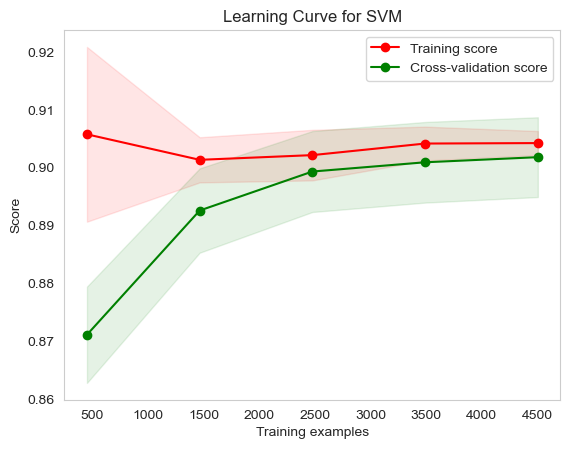

In [67]:
plot_learning_curve(svm_model, 'Learning Curve for SVM', X_train_scaled, y_train, cv=5)
plt.show()

### Random Forest 

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [69]:
rf_model = RandomForestClassifier(class_weight = 'balanced', n_estimators=100, random_state = 42)  
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [70]:
y_pred = rf_model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       509
           1       0.89      0.85      0.87       196

    accuracy                           0.93       705
   macro avg       0.92      0.91      0.91       705
weighted avg       0.93      0.93      0.93       705



After training the model with the parameters: class_weight = 'balanced', n_estimators=100, I'm looking to improve this model by searching for the optimal hyperparameters. In order to do so, we will be running a gridsearch with random forest classifier class_weight = 'balanced'. Here, we are trying to find the best n_estimators and max_depth parameters. 

In [71]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],  
    'max_depth': [None, 10, 20, 30, 40] 
}

rf = RandomForestClassifier(class_weight = 'balanced', random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)  

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'max_depth': 20, 'n_estimators': 200}
Best score found:  0.9316532204046961


In [72]:
param_grid = {
    'n_estimators': [200, 300, 400, 500],  
}

rf = RandomForestClassifier(class_weight = 'balanced', random_state=42, max_depth = 20)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)  

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters found:  {'n_estimators': 300}
Best score found:  0.9320086177957165


In [73]:
rf_model = RandomForestClassifier(class_weight = 'balanced', n_estimators=300, max_depth = 20, random_state = 42)  
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=300,
                       random_state=42)

In [74]:
y_pred = rf_model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       509
           1       0.88      0.86      0.87       196

    accuracy                           0.93       705
   macro avg       0.92      0.91      0.91       705
weighted avg       0.93      0.93      0.93       705



In [75]:
y_pred = rf_model.predict(X_val)
y_proba = rf_model.predict_proba(X_val)[:, 1]  

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_proba)  

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.93
Precision: 0.88
Recall: 0.86
F1 Score: 0.87
ROC AUC Score: 0.98


In [76]:
cm = confusion_matrix(y_val, y_pred)
cm_df = pd.DataFrame(cm, 
                     index=['Actual Negative', 'Actual Positive'], 
                     columns=['Predicted Negative', 'Predicted Positive'])
print(cm_df)

                 Predicted Negative  Predicted Positive
Actual Negative                 487                  22
Actual Positive                  27                 169


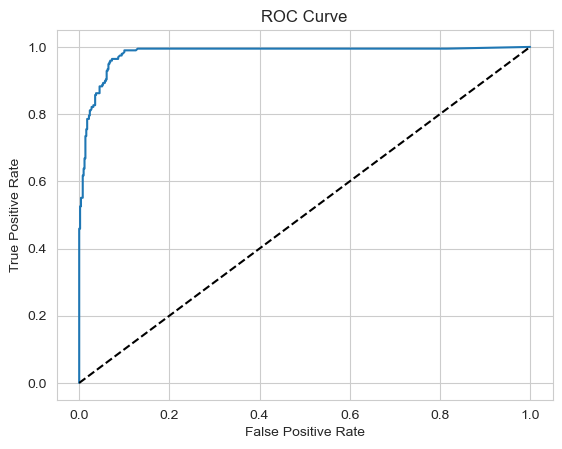

In [77]:
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

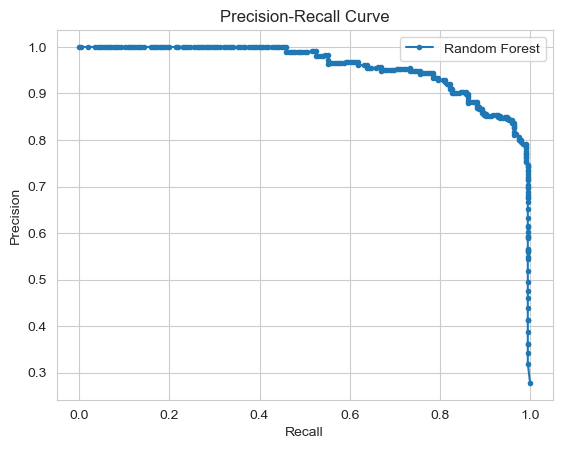

In [78]:
precision, recall, _ = precision_recall_curve(y_val, y_proba)

plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()

Below, we show the graph of feature importance in Random Forest. Feature importance tells us which features were most impactful in making the predictions. As noticeable in the data below, Churn Score appears to have the highest importance. This is similar to the feature importance generated by our Logistic Regression. It again comes to my attention that though Churn Score didn't look significant in the EDA phase, it's clear that the Churn Score has been a great predicting feature for Churn Users.

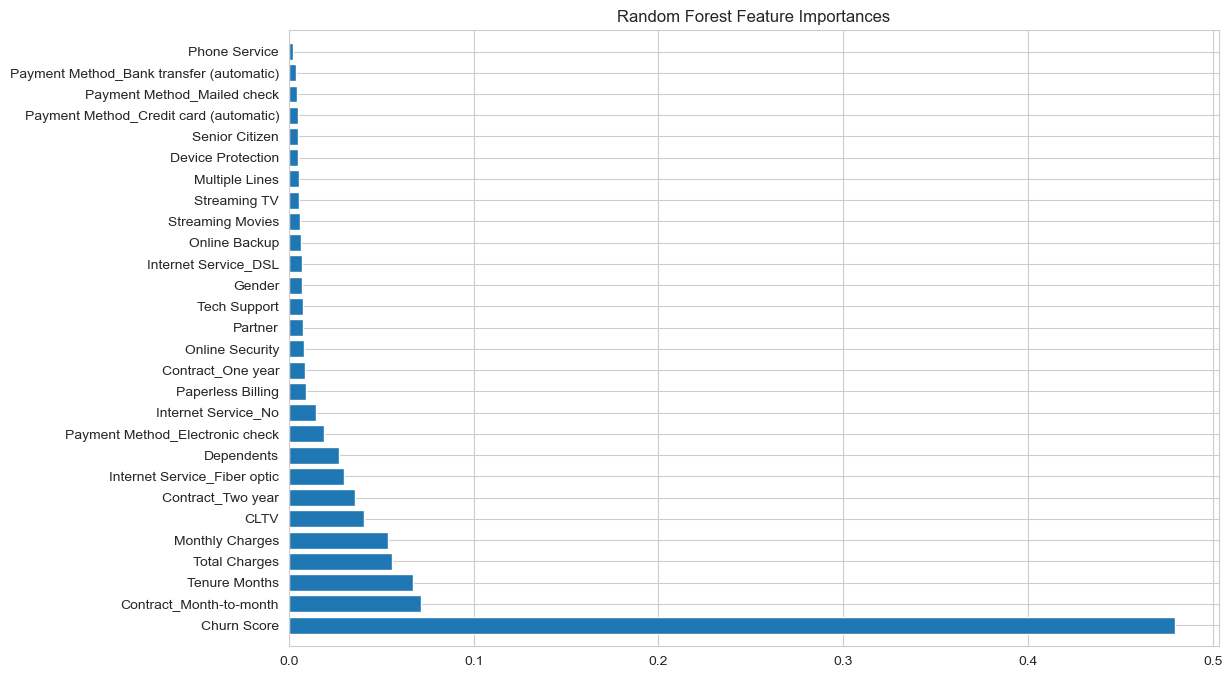

In [79]:
importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Random Forest Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align='center')
plt.yticks(range(X_train.shape[1]), [feature_names[i] for i in indices])
plt.ylim([-1, X_train.shape[1]])
plt.show()

Here we can visualize the decision making process of the tree to better understand how our data is being processed.

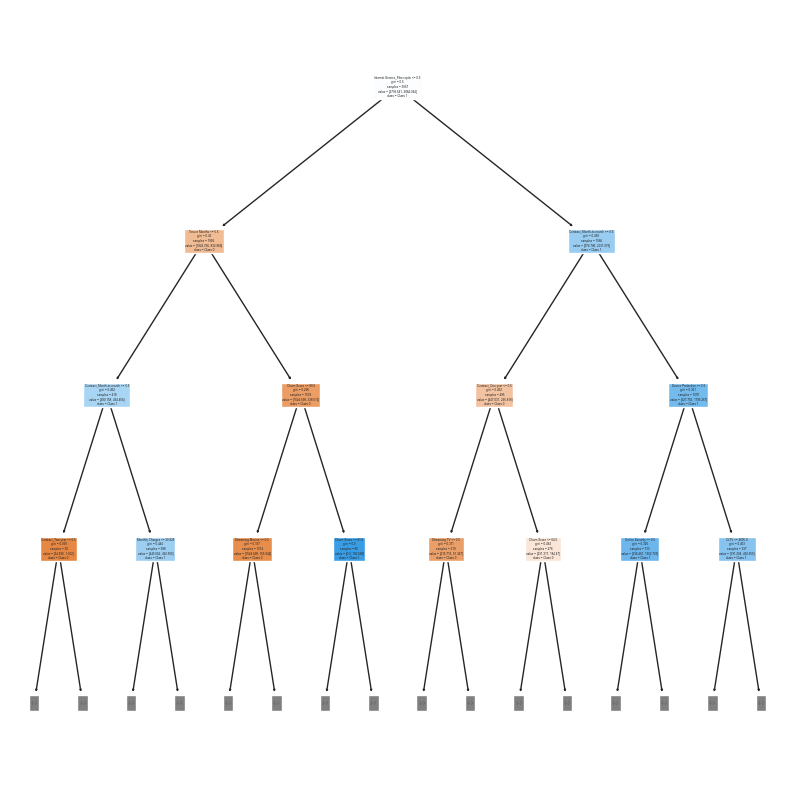

In [80]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'], max_depth=3)
plt.show()

### Gradient Boosting Classifier

In [81]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [82]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

gbc.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [83]:
y_pred = gbc.predict(X_val_scaled)
y_proba = gbc.predict_proba(X_val_scaled)[:, 1]  

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_proba)  

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.93
Precision: 0.89
Recall: 0.86
F1 Score: 0.88
ROC AUC Score: 0.99


In [84]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],  
    'max_depth': [None, 10, 20, 30, 40],
    'learning_rate': [0,1.0,2.0,3.0] 
}

gbc = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)  

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters found:  {'learning_rate': 1.0, 'max_depth': 10, 'n_estimators': 50}
Best score found:  0.9238433036354554


In [85]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=10, random_state=42)
gbc.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=10, n_estimators=50,
                           random_state=42)

In [86]:
y_pred = gbc.predict(X_val_scaled)
y_proba = gbc.predict_proba(X_val_scaled)[:, 1]  

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_proba)  

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 0.92
Precision: 0.87
Recall: 0.86
F1 Score: 0.86
ROC AUC Score: 0.98


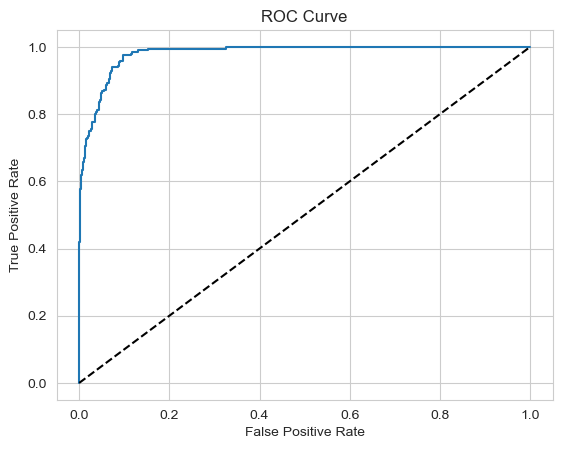

In [87]:
fpr, tpr, thresholds = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

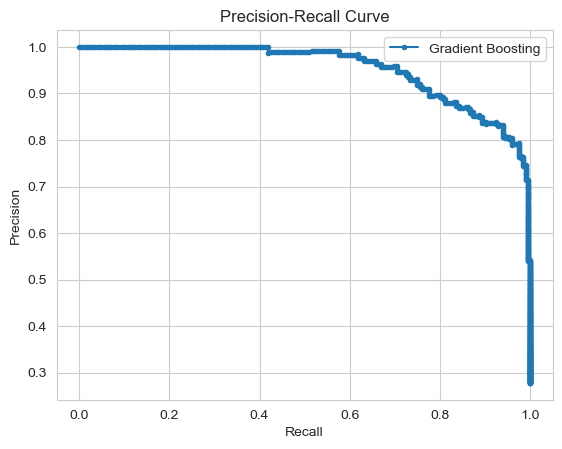

In [88]:
precision, recall, _ = precision_recall_curve(y_val, y_proba)

plt.plot(recall, precision, marker='.', label='Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()

In [89]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       509
           1       0.87      0.86      0.86       196

    accuracy                           0.92       705
   macro avg       0.91      0.91      0.91       705
weighted avg       0.92      0.92      0.92       705



In [90]:
cm = confusion_matrix(y_val, y_pred)
cm_df = pd.DataFrame(cm, 
                     index=['Actual Negative', 'Actual Positive'], 
                     columns=['Predicted Negative', 'Predicted Positive'])
print(cm_df)

                 Predicted Negative  Predicted Positive
Actual Negative                 483                  26
Actual Positive                  27                 169


We generate the feature importance for the Gradient Boosting Classifier as well. Similar to the Logistic Regression and Random Forest Classifier, we notice that Churn Score is the highest in terms of feature importance, again signifying that Churn Score is an accurate indicator of Churn users.

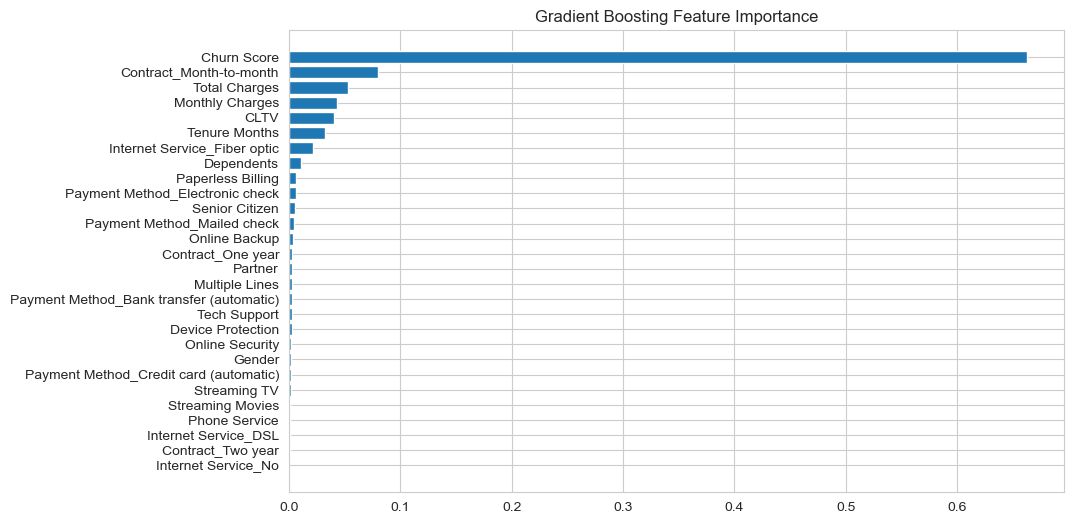

In [91]:
feature_importance = gbc.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Gradient Boosting Feature Importance')
plt.show()

### Nueral Network

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  
    Dense(10, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

In [93]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [94]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5534 - loss: 0.7681 - val_accuracy: 0.7553 - val_loss: 0.4811
Epoch 2/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.8180 - loss: 0.4146 - val_accuracy: 0.8475 - val_loss: 0.3560
Epoch 3/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.8753 - loss: 0.3113 - val_accuracy: 0.8741 - val_loss: 0.2932
Epoch 4/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.8918 - loss: 0.2694 - val_accuracy: 0.8954 - val_loss: 0.2512
Epoch 5/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.9105 - loss: 0.2263 - val_accuracy: 0.9043 - val_loss: 0.2239
Epoch 6/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.9241 - loss: 0.2050 - val_accuracy: 0.9131 - val_loss: 0.2089
Epoch 7/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.9178 - loss: 0.1985 - val_accuracy: 0.9149 - val_loss: 0.1959
Epoch 8/100
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9138 - loss: 0.1

In [95]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.8767 - loss: 0.2523
Test Accuracy: 89.36%


In [96]:
predictions = model.predict(X_test_scaled)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [97]:
y_pred = model.predict(X_val_scaled)
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]

accuracy = accuracy_score(y_val, y_pred_binary)
precision = precision_score(y_val, y_pred_binary)
recall = recall_score(y_val, y_pred_binary)
f1 = f1_score(y_val, y_pred_binary)
roc_auc = roc_auc_score(y_val, y_pred)  

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
Accuracy: 0.93
Precision: 0.91
Recall: 0.85
F1 Score: 0.88
ROC AUC Score: 0.98


In [98]:
!pip install keras-tuner

In [99]:
from tensorflow import keras
from keras_tuner import RandomSearch

def build_model(hp):
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train_scaled.shape[1],)),  
        keras.layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')  
    ])
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',  
                  metrics=['accuracy'])
    return model

In [100]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  
    executions_per_trial=1,  
    directory='my_dir',  
    project_name='intro_to_kt')

Reloading Tuner from my_dir\intro_to_kt\tuner0.json


In [101]:
tuner.search(X_train_scaled, y_train,
             epochs=10,
             validation_data=(X_val_scaled, y_val))

In [102]:
best_model = tuner.get_best_models(num_models=1)[0]

C:\Users\seanp\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [103]:
test_loss, test_acc = best_model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', test_acc)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - accuracy: 0.8854 - loss: 0.2554
Test accuracy: 0.9035460948944092


In [104]:
y_pred_probs = best_model.predict(X_val_scaled)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]

precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_probs)  

# Print metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Precision: 0.90
Recall: 0.85
F1 Score: 0.87
ROC AUC Score: 0.98


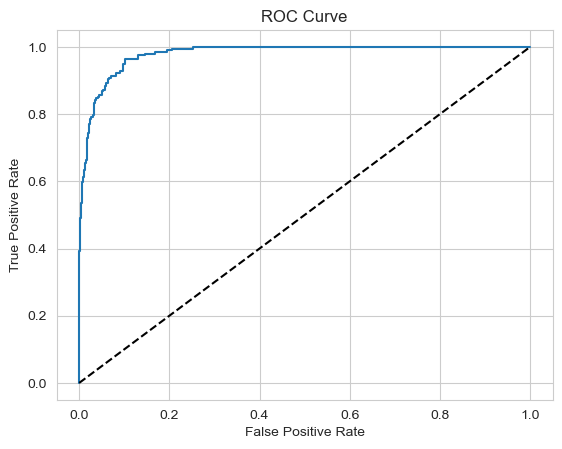

In [105]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [106]:
print("\nClassification report:\n", classification_report(y_val, y_pred))


Classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       509
           1       0.90      0.85      0.87       196

    accuracy                           0.93       705
   macro avg       0.92      0.90      0.91       705
weighted avg       0.93      0.93      0.93       705



In [107]:
cm = confusion_matrix(y_val, y_pred)
cm_df = pd.DataFrame(cm, 
                     index=['Actual Negative', 'Actual Positive'], 
                     columns=['Predicted Negative', 'Predicted Positive'])
print(cm_df)

                 Predicted Negative  Predicted Positive
Actual Negative                 490                  19
Actual Positive                  30                 166


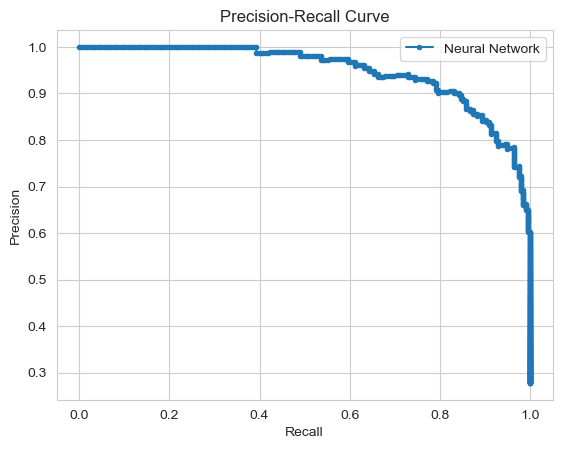

In [108]:
precision, recall, _ = precision_recall_curve(y_val, y_pred_probs)

plt.plot(recall, precision, marker='.', label='Neural Network')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()

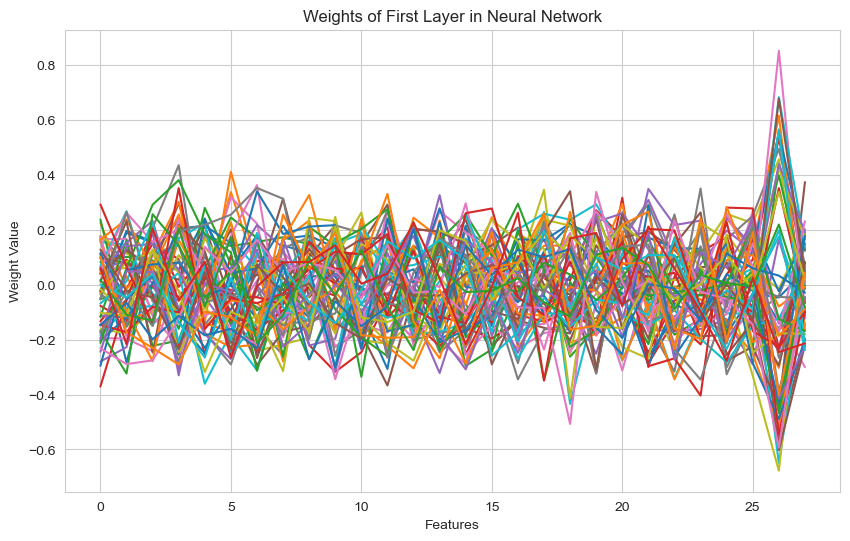

In [109]:
weights, biases = best_model.layers[0].get_weights()

plt.figure(figsize=(10, 6))
plt.plot(weights)
plt.title('Weights of First Layer in Neural Network')
plt.xlabel('Features')
plt.ylabel('Weight Value')
plt.show()

## Conclusion

In [110]:
# Logistic Regression
y_pred = lr.predict(X_test_scaled) 
print("\nLogistic Regression Classification report:\n", classification_report(y_test, y_pred))


Logistic Regression Classification report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       513
           1       0.75      0.90      0.82       192

    accuracy                           0.89       705
   macro avg       0.85      0.89      0.87       705
weighted avg       0.90      0.89      0.89       705



In [111]:
# SVM
y_pred = svm_model.predict(X_test_scaled)
print("\nSVM Classification report:\n", classification_report(y_test, y_pred))


SVM Classification report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.91       513
           1       0.72      0.92      0.81       192

    accuracy                           0.88       705
   macro avg       0.84      0.89      0.86       705
weighted avg       0.90      0.88      0.89       705



In [112]:
# Random Forest
y_pred = rf_model.predict(X_test)
print("\nRandom Forest Classification report:\n", classification_report(y_test, y_pred))


Random Forest Classification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       513
           1       0.86      0.88      0.87       192

    accuracy                           0.93       705
   macro avg       0.91      0.91      0.91       705
weighted avg       0.93      0.93      0.93       705



In [113]:
# Gradient Boosting
y_pred = gbc.predict(X_test_scaled)
print("\nGBC Classification report:\n", classification_report(y_test, y_pred))


GBC Classification report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       513
           1       0.85      0.84      0.84       192

    accuracy                           0.91       705
   macro avg       0.89      0.89      0.89       705
weighted avg       0.91      0.91      0.91       705



In [114]:
# Neural Network
y_pred_probs = best_model.predict(X_test_scaled)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]
print("\nNeural Network Classification report:\n", classification_report(y_test, y_pred))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step

Neural Network Classification report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       513
           1       0.82      0.83      0.82       192

    accuracy                           0.90       705
   macro avg       0.88      0.88      0.88       705
weighted avg       0.90      0.90      0.90       705



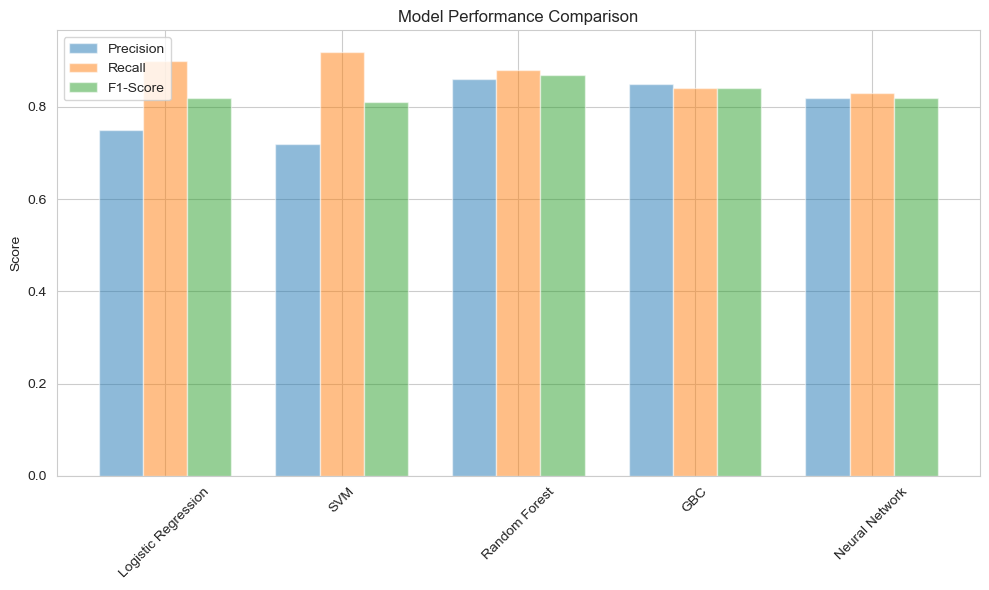

In [115]:
metrics = {
    'Logistic Regression': (0.75, 0.90, 0.82),
    'SVM': (0.72, 0.92, 0.81),
    'Random Forest': (0.86, 0.88, 0.87),
    'GBC': (0.85, 0.84, 0.84),
    'Neural Network': (0.82, 0.83, 0.82)
}

models = list(metrics.keys())
precision = [metrics[model][0] for model in models]
recall = [metrics[model][1] for model in models]
f1_score = [metrics[model][2] for model in models]

pos = np.arange(len(models))
bar_width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(pos - bar_width, precision, bar_width, label='Precision', alpha=0.5)
plt.bar(pos, recall, bar_width, label='Recall', alpha=0.5)
plt.bar(pos + bar_width, f1_score, bar_width, label='F1-Score', alpha=0.5)

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(pos)
ax.set_xticklabels(models)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

Considering the context of a telecommunications company aiming to predict churn, it's crucial to balance between correctly identifying customers who are likely to churn (recall) and not misclassifying too many loyal customers as potential churners (precision). From the classification reports provided for Logistic Regression, SVM, Random Forest, Gradient Boosting, and Neural Network models, we observe varying degrees of performance across these metrics.

In the scenario of predicting churn, high recall is essential because it reflects the model's ability to catch a high percentage of actual churn cases. However, this should not come at the expense of precision, where a low precision would mean many loyal customers are mistakenly targeted as churn risks, potentially leading to unnecessary retention efforts and offers, which could be costly and inefficient.

Given the trade-off between precision and recall, F1-score serves as a harmonized measure, balancing both aspects. Nonetheless, in the specific context of churn prediction where the cost of false negatives (failing to identify a churn user) might be higher than false positives (wrongly identifying a user as churn), a model with a slightly lower precision but significantly higher recall could be more desirable, provided the precision remains reasonably high to avoid excessive misclassification.

Based on the classification reports and considering the precision-recall trade-off, the model that offers a balanced approach with high recall while maintaining reasonable precision would be most suitable. From the reports, while some models may exhibit high precision or recall in isolation, the key is to select a model that ensures a substantial number of churn users are accurately predicted without overly targeting loyal customers.

The final choice would also depend on the company's strategy and tolerance for risk in terms of customer engagement and retention efforts. If retaining every possible churn customer is paramount, a model with the highest recall may be preferred, even if it means engaging with more customers than necessary. Conversely, if the company wishes to be more selective and cost-efficient in its retention efforts, a model with the best balance of high recall and precision, as indicated by a high F1-score, might be the optimal choice.

**Random Forest** shows the best overall performance with a precision of 0.86 and a recall of 0.88 for the churn users (class 1). It achieves the highest accuracy (0.93) and a balanced precision-recall tradeoff, making it an excellent choice for identifying churn users effectively while minimizing false positives.

**Gradient Boosting Classifier** (GBC) also performs well, with precision and recall of 0.85 and 0.84, respectively, for churn users. It has an overall accuracy of 0.91. While slightly lower than Random Forest, it still represents a viable option, offering a good balance between identifying churn users and limiting incorrect churn predictions.

**Neural Network and Logistic Regression** models show comparable performances, with a slightly higher recall than precision in the case of Logistic Regression, indicating a tendency to prioritize the identification of churn users over the reduction of false positives. Neural Network offers a more balanced approach but with slightly lower recall compared to Random Forest and GBC.

**Support Vector Machine (SVM)**, while having a high recall of 0.92 for churn users, suffers from a lower precision (0.72). This implies that while it's good at identifying churn users, it may also incorrectly label non-churn users as churn, leading to unnecessary offers and discounts being given out.

Considering the business objective of efficiently identifying churn users without overly increasing the false positives, Random Forest emerges as the best model due to its superior balance of precision and recall, highest accuracy, and overall performance. It ensures that most churn users are accurately identified with a minimal rate of false positives, aligning with the company's goal of retaining clientship through targeted offers.